In [13]:
# -*- coding: UTF-8 -*-

import cv2
import os
from moviepy.editor import *
import json
import PIL
#import tqdm
from tqdm._tqdm_notebook import tqdm_notebook as tqdm
import glob
import random
import math
import numpy as np
import scipy.ndimage
import copy
import pandas as pd
import matplotlib.pyplot as plt
import sys
import matplotlib.gridspec as gridspec
import seaborn as sns
from PIL import Image
import mpl_toolkits.axes_grid1

server_data = '/Volumes/Drosophila2/Data'
local_data = '/Users/hiroki/Desktop/study/code/data'

datasets = {
        'mating'    : 'TsukubaRIKEN/mating_movie',
        'smile1'    : 'TsukubaRIKEN/seong09-191214-w1118EclosedFemale-smile-24h',
        'smile2'    : 'TsukubaRIKEN/seong09-191214-w1118EclosedMale-smile-24h',
        'w1118_1'   : 'TsukubaRIKEN/seong09-200429.w1118.M.ST',
        'w1118_2'   : 'TsukubaRIKEN/seong07-200422-w1118.F.ST',
        'w1118_3'   : 'TsukubaRIKEN/seong08-200429-w1118.ST.all-free',
        'OrR_1'     : 'TsukubaRIKEN/seong05-200514-OrR.M.ST',
        'OrR_2'     : 'TsukubaRIKEN/seong06-200514-OrR.F.ST',
        'OrR_3'     : 'TsukubaRIKEN/seong08-200514-0rR.ST.all-free',
        'CS_1'      : 'TsukubaRIKEN/seong09-200513.CS.M.ST',
        'CS_2'      : 'TsukubaRIKEN/seong10-20513CS.F.ST',
        'CS_3'      : 'TsukubaRIKEN/seong07-200513-CS.free.ST'
        }

mating_mv = [
        'vi_0033_20190424_133130',
        'vi_0034_20190425_013130',
        'vi_0035_20190425_133130',
        'vi_0036_20190426_013130',
        'vi_0037_20190426_133131',
        'vi_0038_20190427_013131',
        'vi_0039_20190427_133131',
        ]

smile1_mv = [
            'seong09-191214-w1118EclosedFemale-smile-24h',
            'seong09-191214-w1118EclosedFemale-smile-empty',
            'seong09-191214-w1118EclosedFemale-smile-empty2'
            ]

smile2_mv = [
            'seong09-191214-w1118EclosedMale-smile-24h',
            'seong09-191214-w1118EclosedMale-smile-empty1',
            'seong09-191214-w1118EclosedMale-smile-empty2'
            ]

w1118_1_mv = [
            'vi_0000_20200429_104213-back',
            'vi_0001_20200429_112841',
            'vi_0002_20200430_112841',
            'vi_0003_20200501_112841'
            ]

w1118_2_mv = [
            'seong07-200422-w1118.F.ST-back',
            'vi_0001_20200429_110751',
            'vi_0002_20200430_110751',
            'vi_0003_20200501_110751'
            ]

w1118_3_mv = [
            'vi_0001_20200429_094729',
            'vi_0002_20200429_104150',
            'vi_0003_20200430_104150',
            'vi_0004_20200501_104150'
            ]

OrR_1_mv = [
            'vi_0099_20200514_152926',
            'vi_0102_20200514_224210',
            'vi_0103_20200515_224210'
            ]

OrR_2_mv = [
            'vi_0110_20200514_152929(1)',
            'vi_0113_20200514_224230(1)',
            'vi_0114_20200515_224230'
            ]

OrR_3_mv = [
            'vi_0011_20200514_153005 (2)',
            'vi_0013_20200514_224247',
            'vi_0014_20200515_224247'
            ]

CS_1_mv =  [
            'vi_0014_20200513_182108 (1)',
            'vi_0015_20200513_193414 (1)',
            'vi_0016_20200514_193414'
            ]

CS_2_mv =  [
            'vi_0006_20200513_182208 (2)',
            'vi_0007_20200513_193827 (1)',
            'vi_0008_20200514_193827'
            ]

CS_3_mv =  [
            'vi_0016_20200513_182125 (1)',
            'vi_0017_20200513_194218 (1)',
            'vi_0018_20200514_194219'
            ]

movies = {
        'mating'    : mating_mv ,
        'smile1'    : smile1_mv ,
        'smile2'    : smile2_mv ,
        'w1118_1'   : w1118_1_mv,
        'w1118_2'   : w1118_2_mv,
        'w1118_3'   : w1118_3_mv,
        'OrR_1'     : OrR_1_mv  ,
        'OrR_2'     : OrR_2_mv  ,
        'OrR_3'     : OrR_3_mv  ,
        'CS_1'      : CS_1_mv   ,
        'CS_2'      : CS_2_mv   ,
        'CS_3'      : CS_3_mv   ,
        }

# 1:Male,2:Female,3:free

targets = [
            #'smile1',
            #'smile2',
            'w1118_1',
            #'w1118_2',
            #'w1118_3',
            #'OrR_1',
            #'OrR_2',
            #'OrR_3',
            'CS_1',
            #'CS_2',
            #'CS_3'
            ]


円の半径による変化と閾値による変化


done.


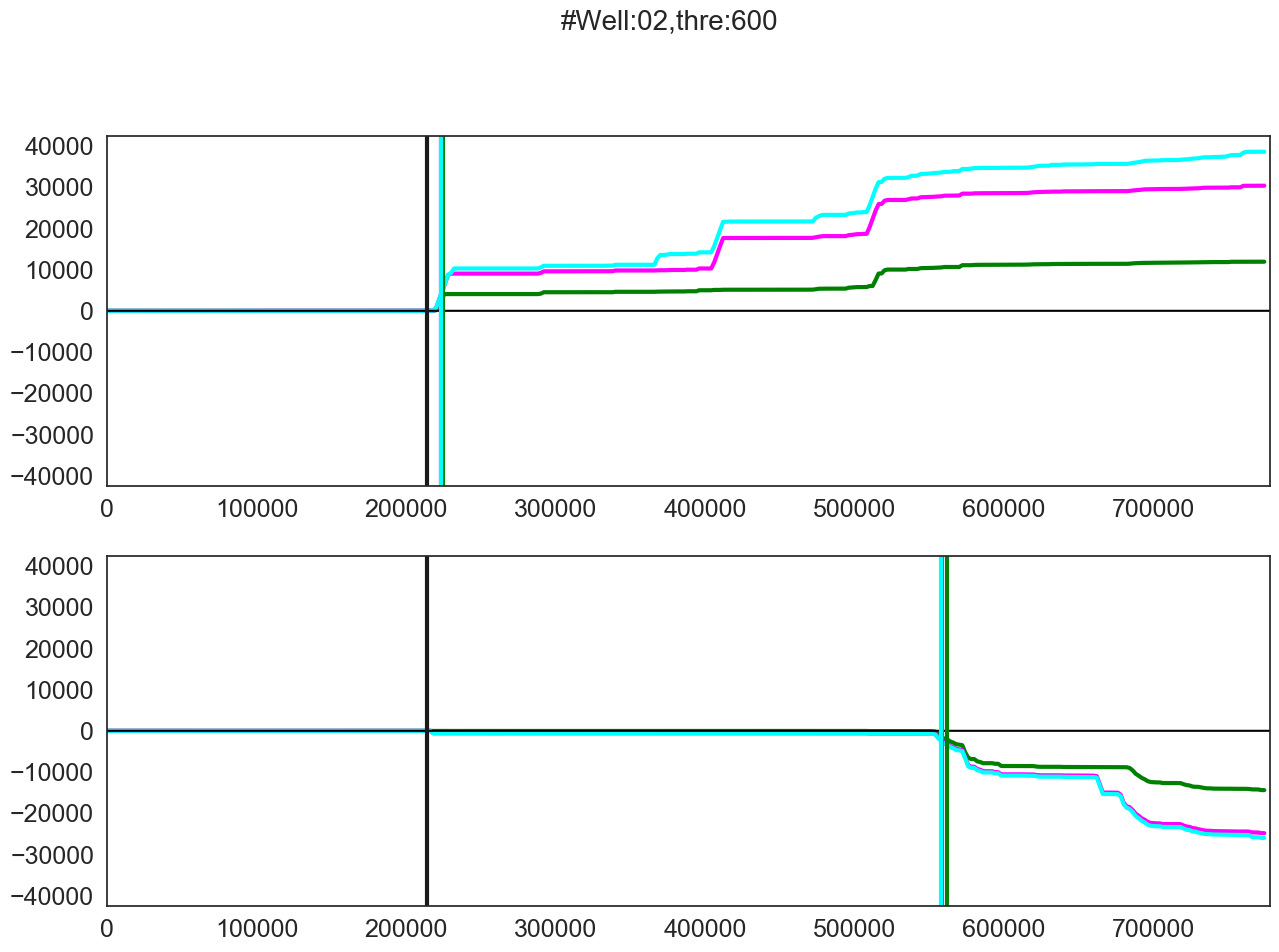

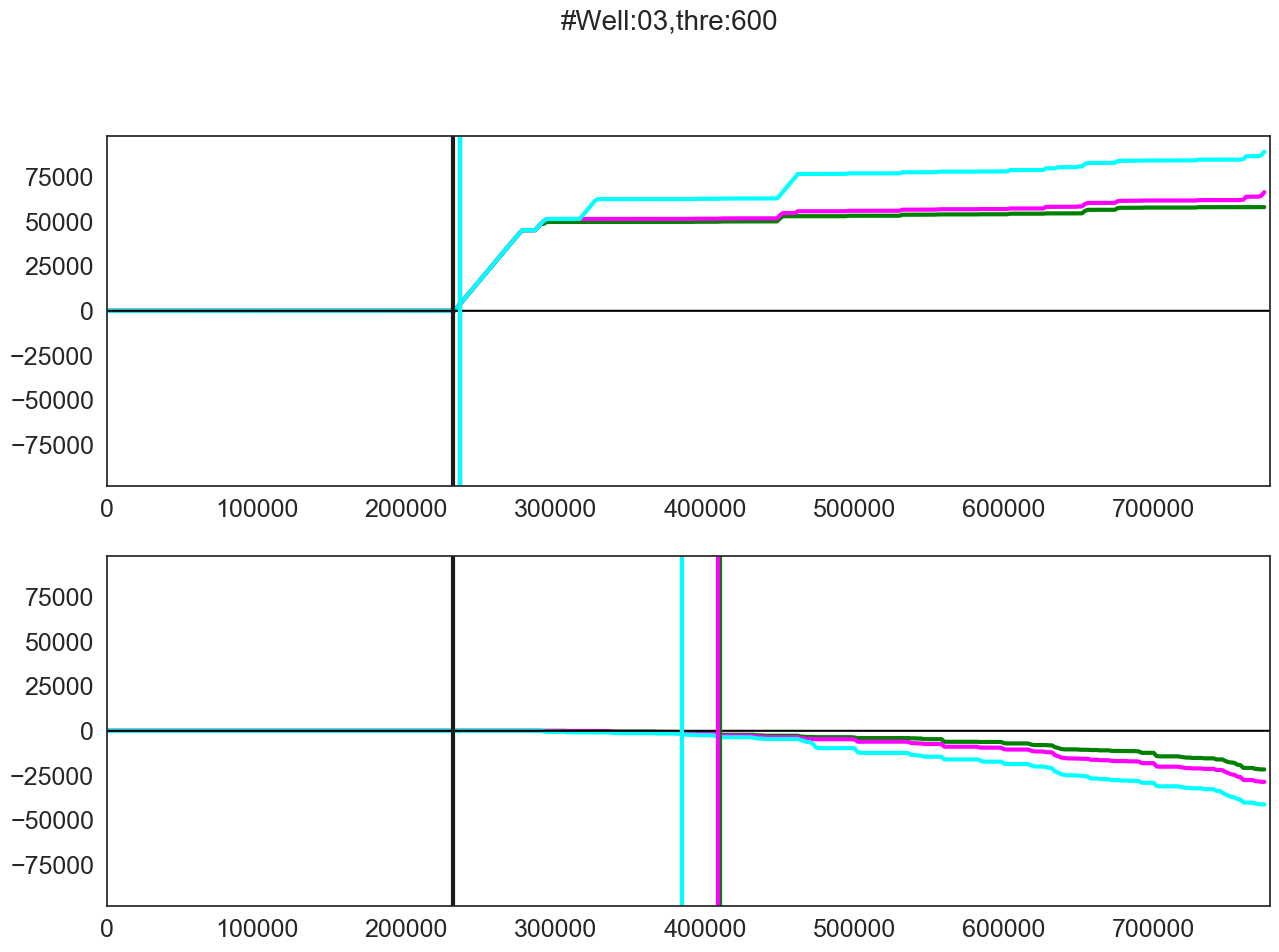

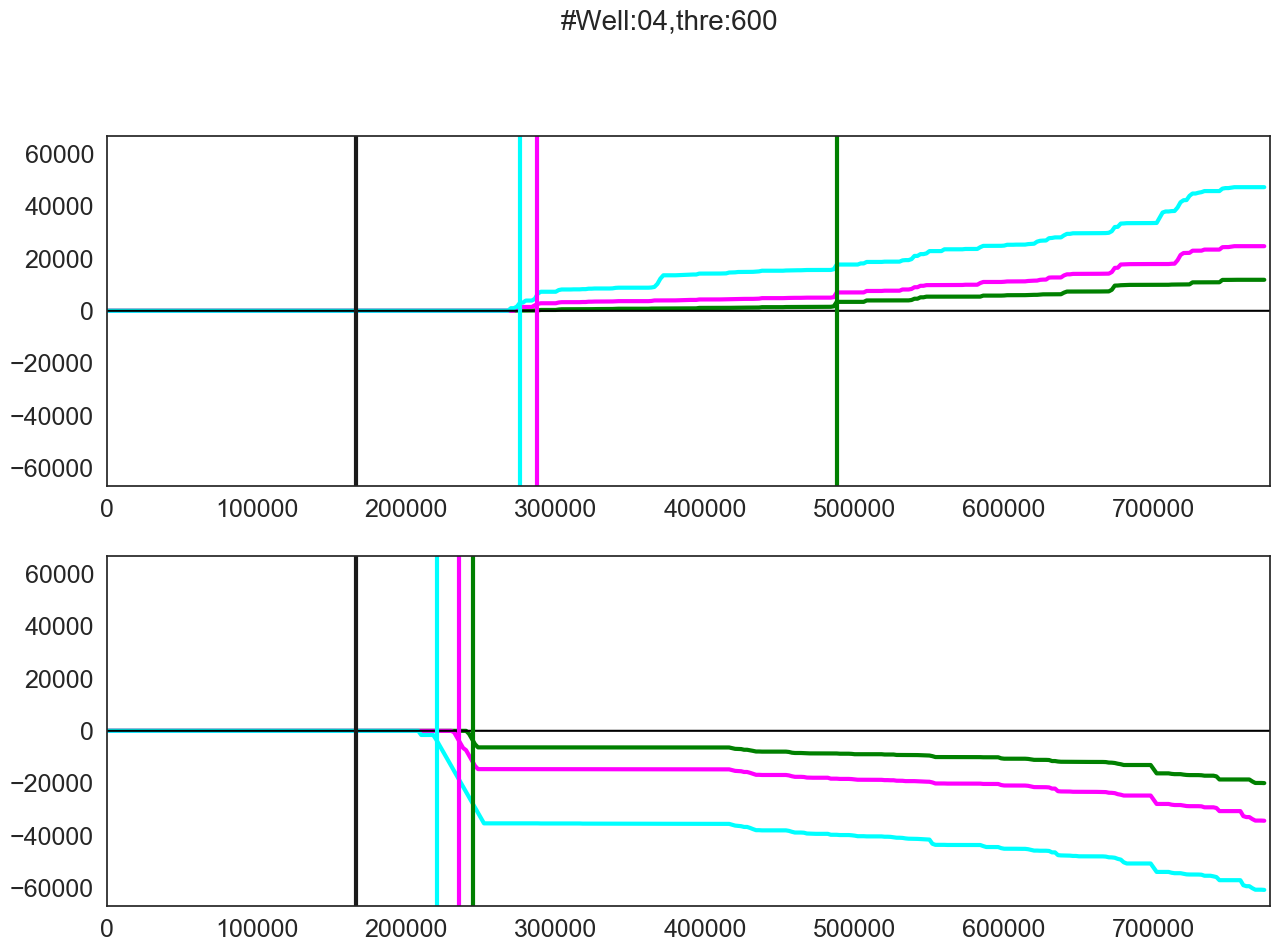

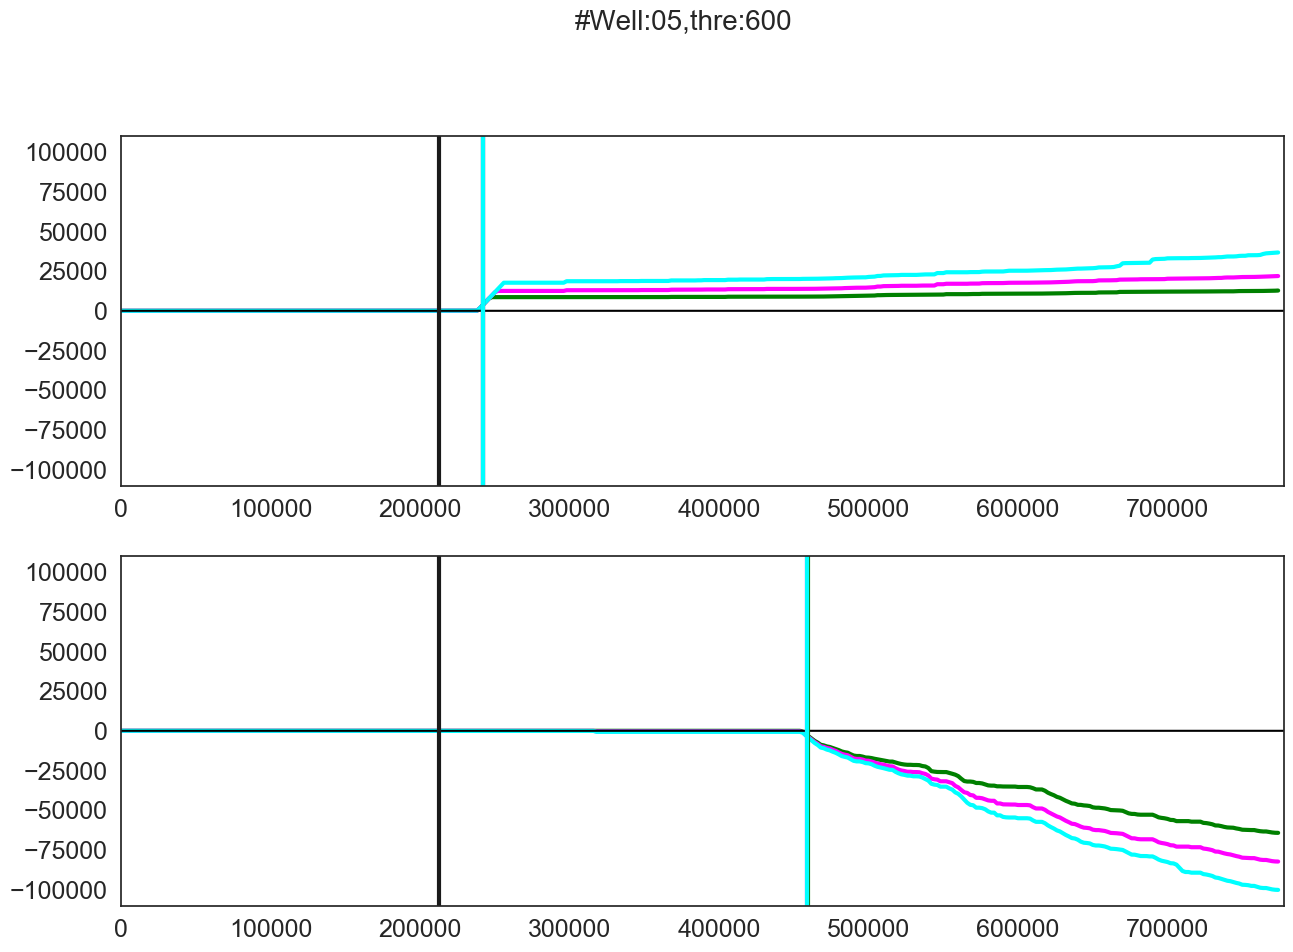

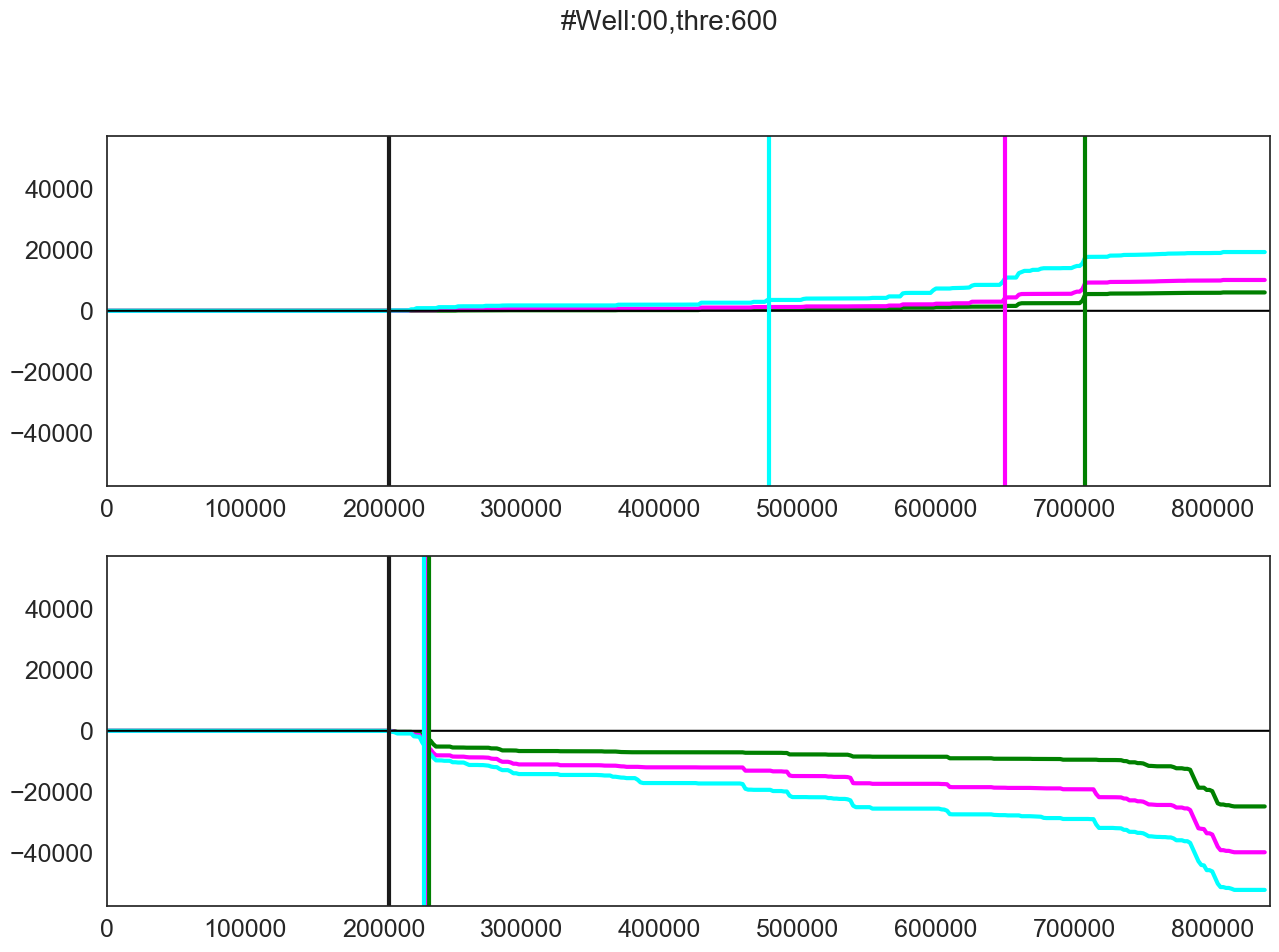

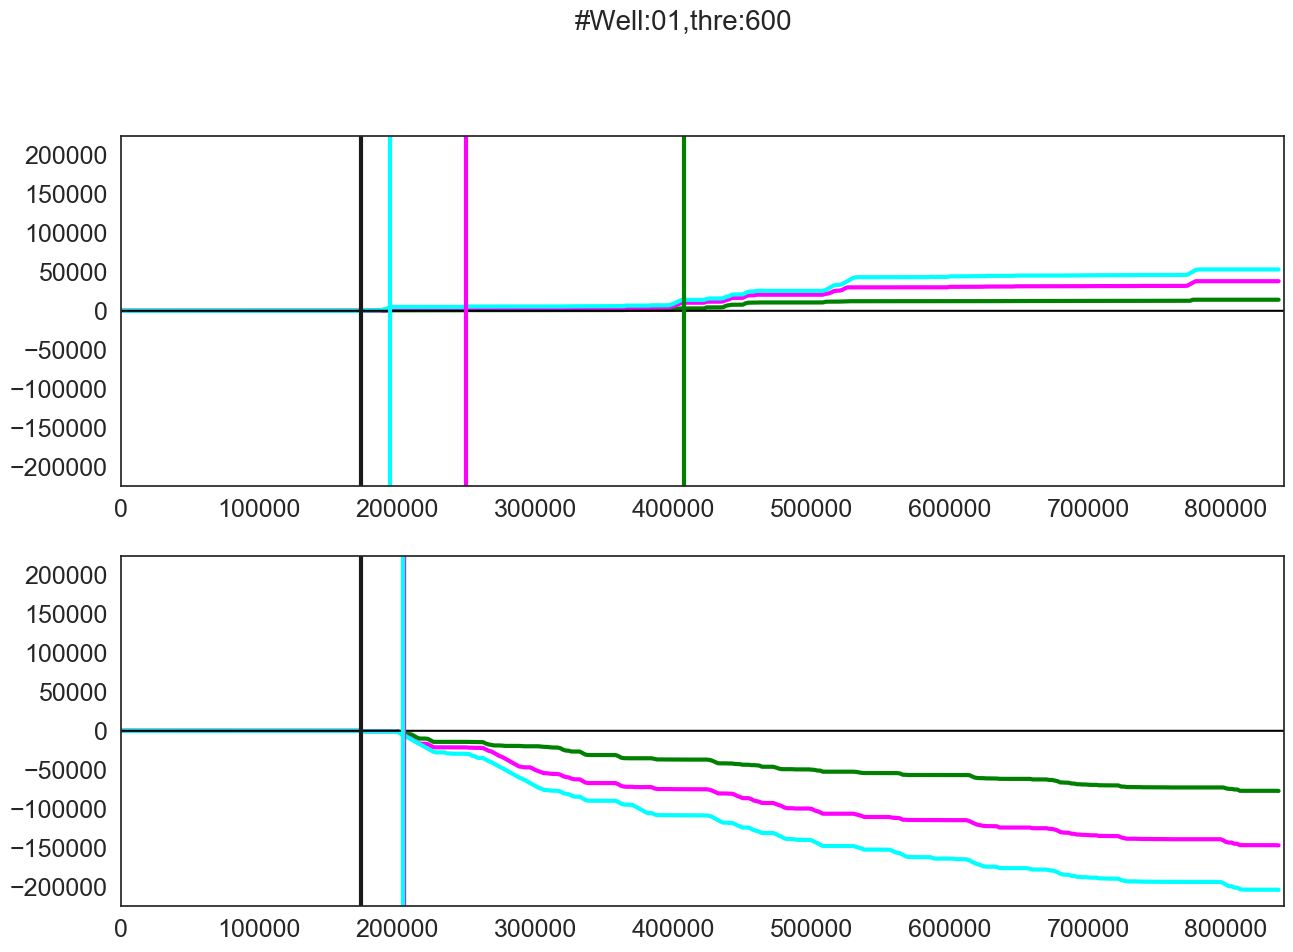

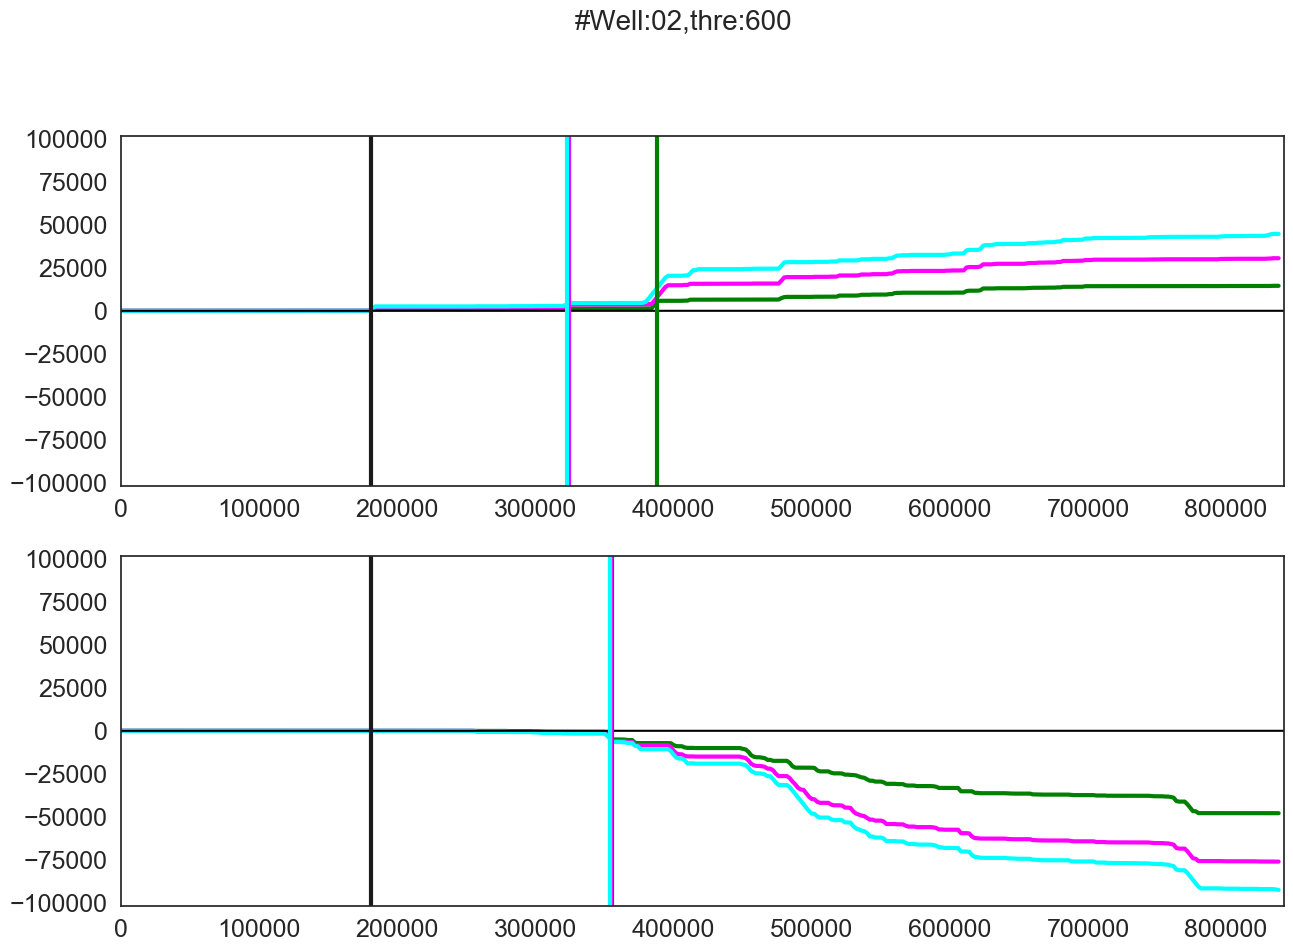

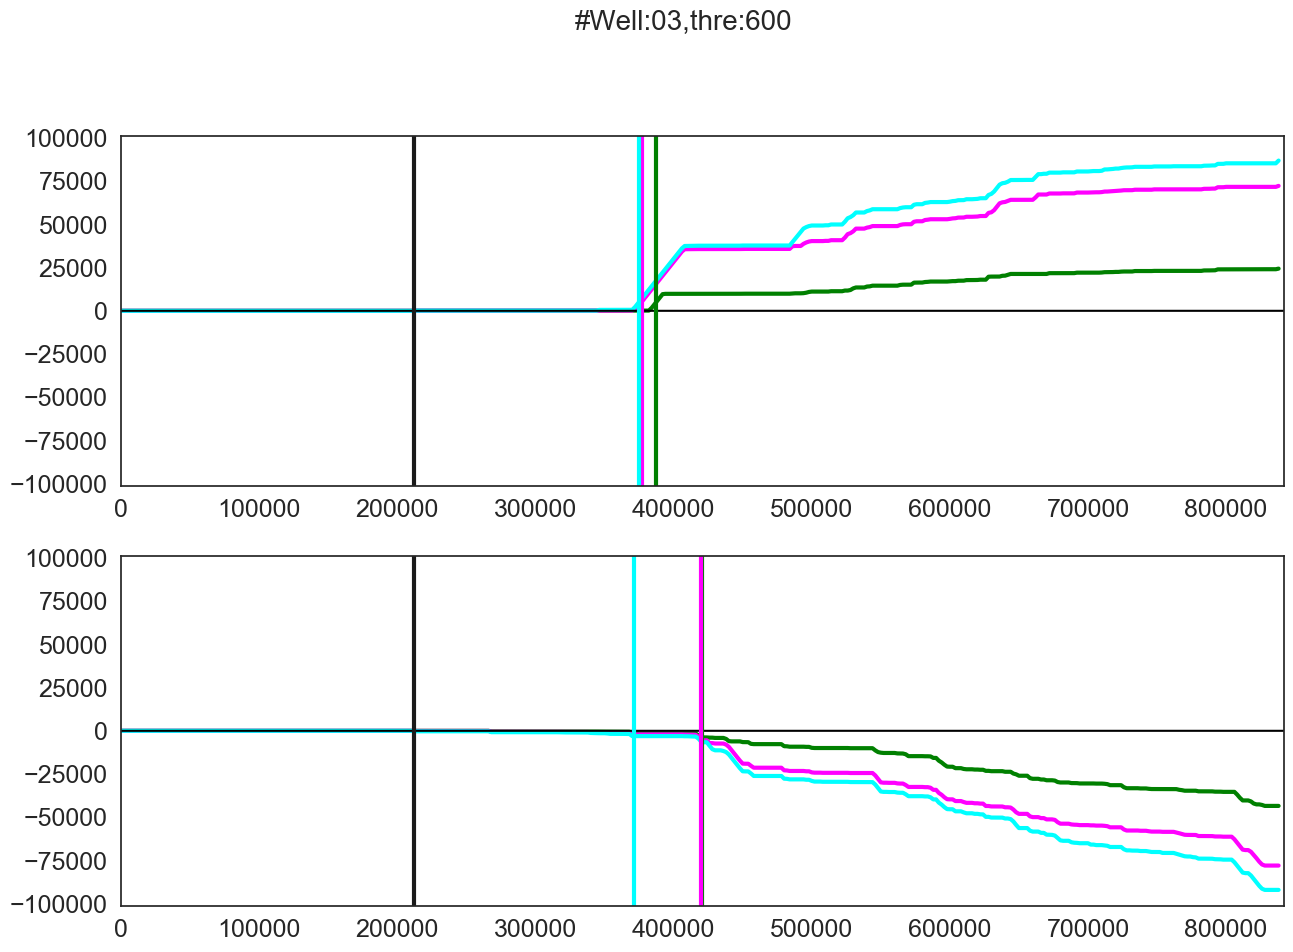

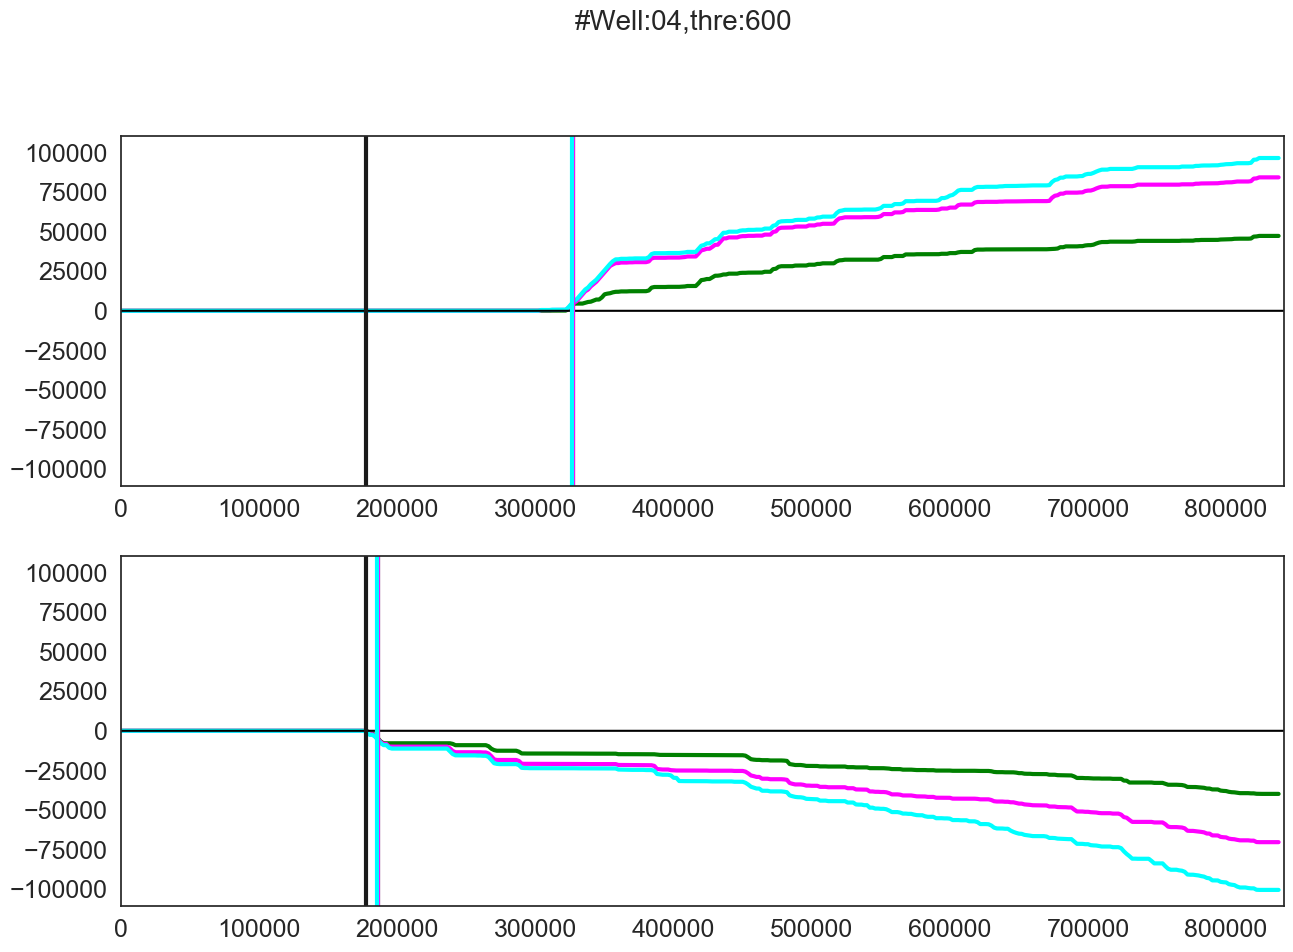

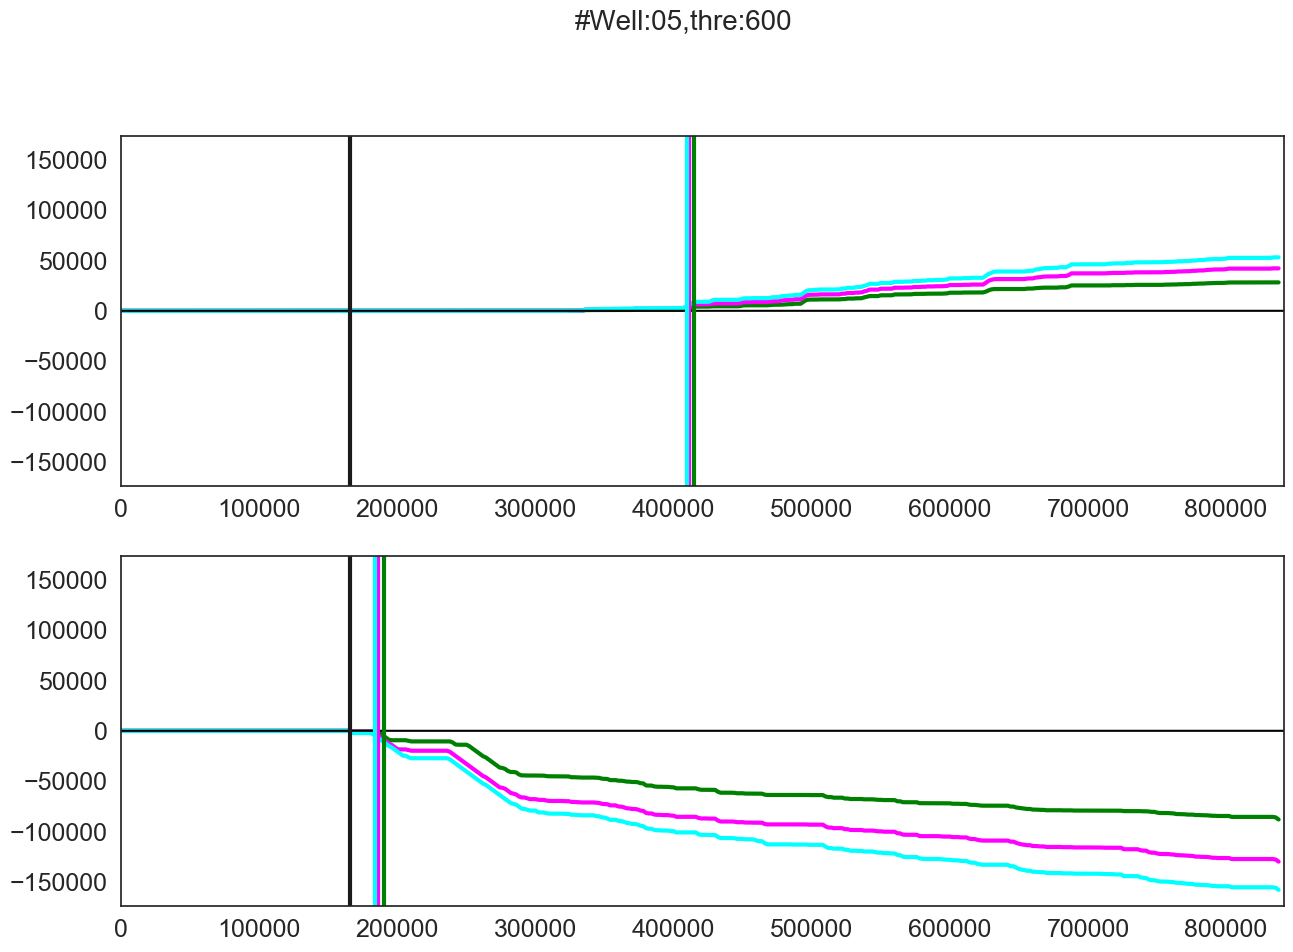

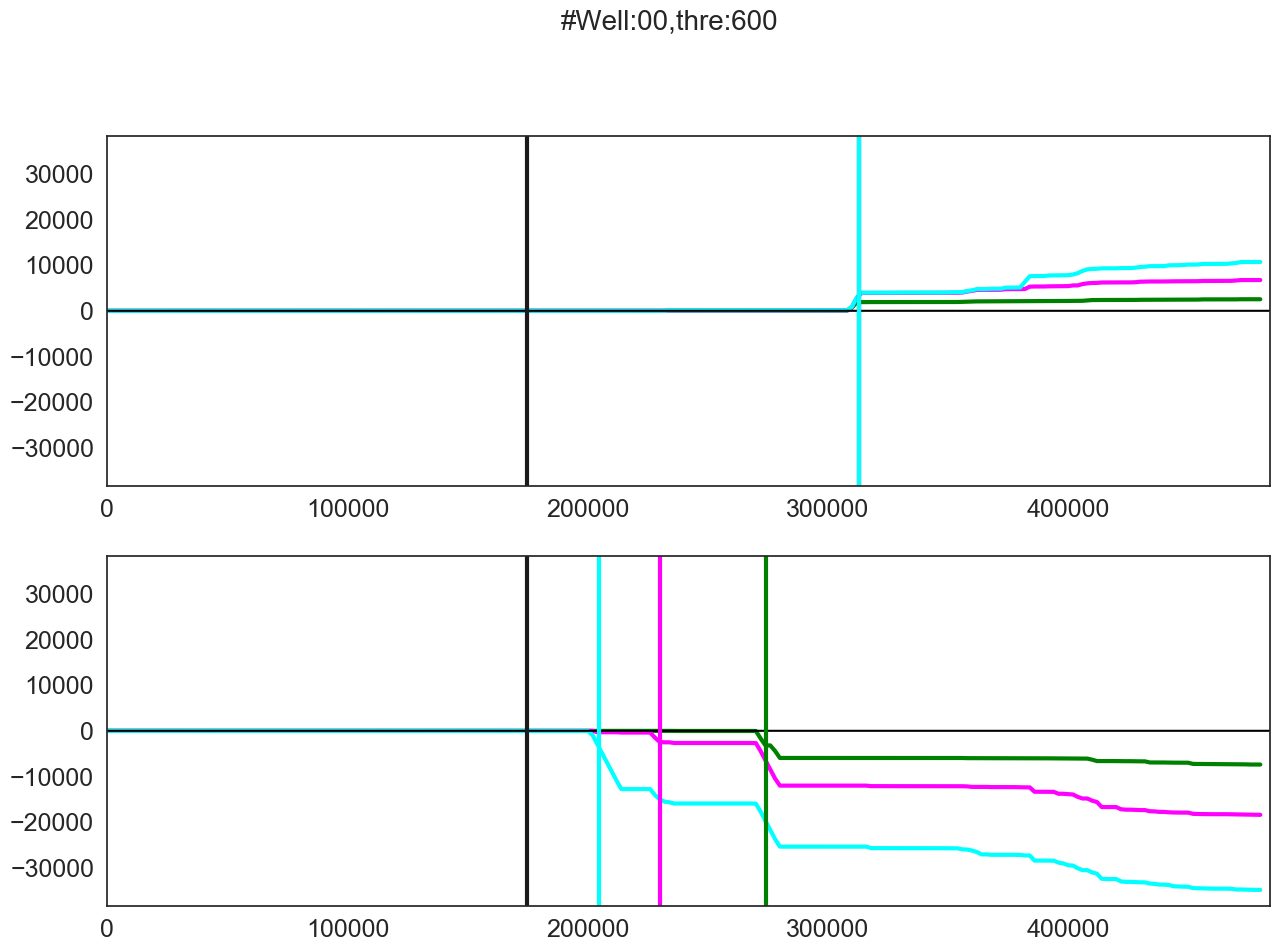

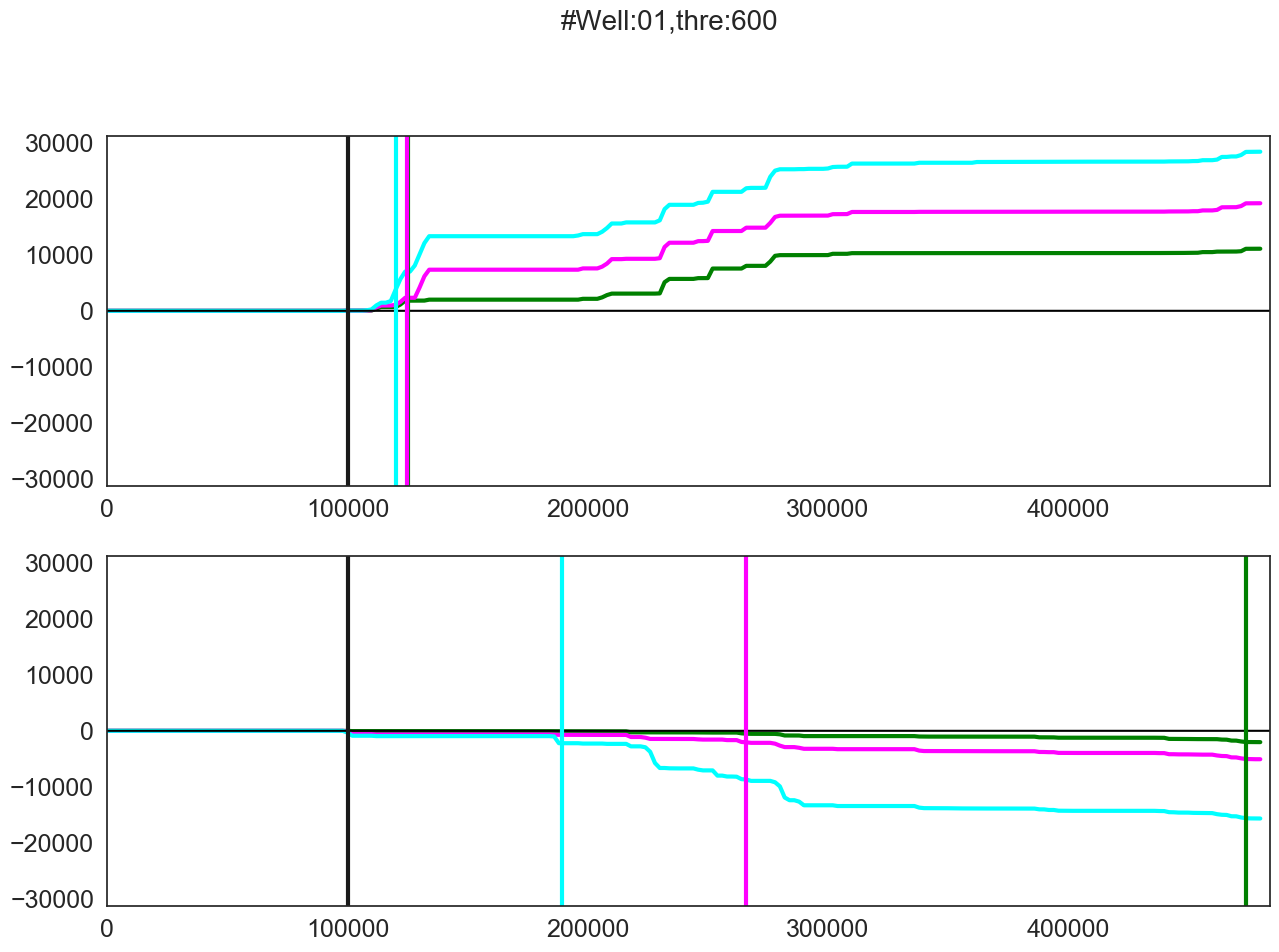

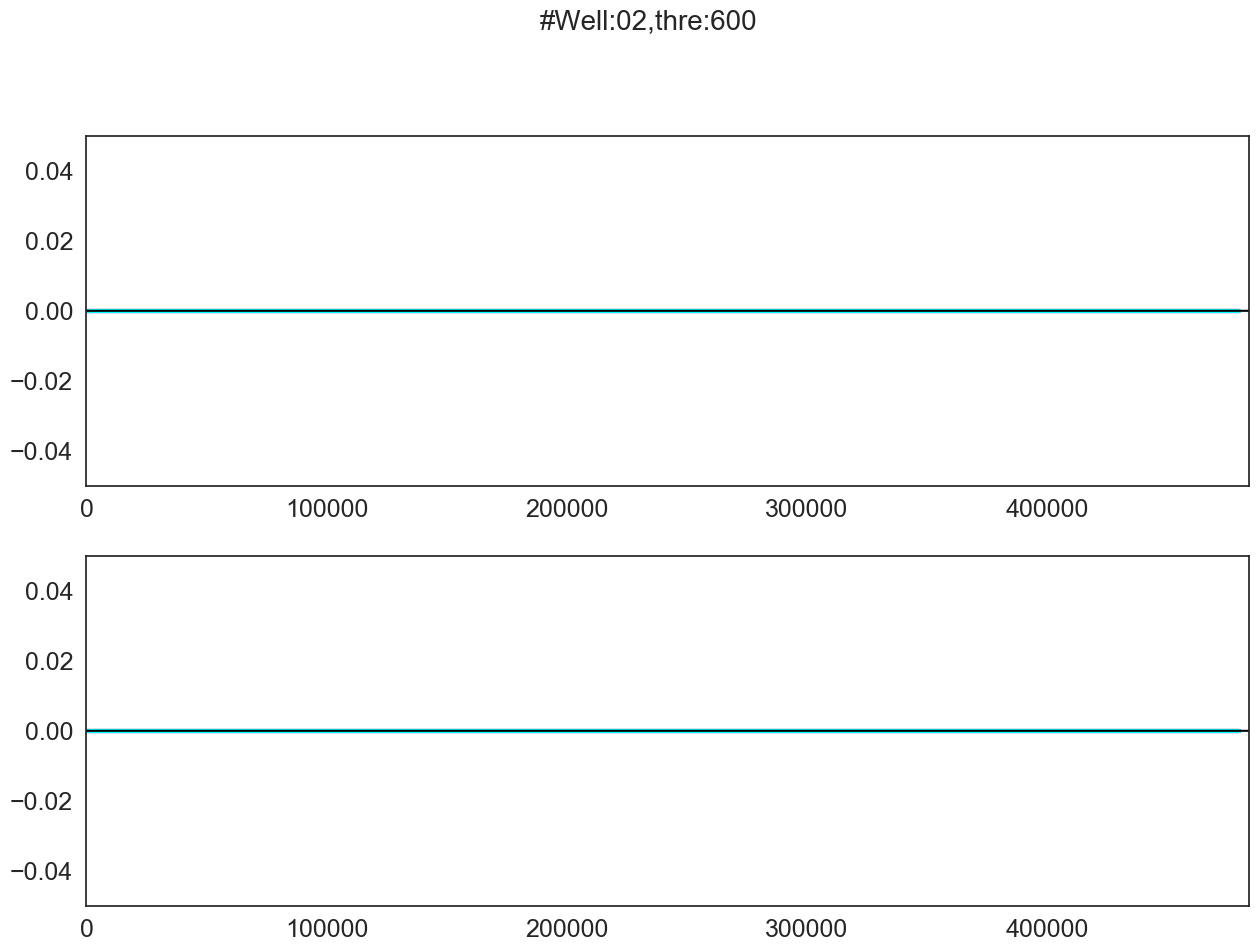

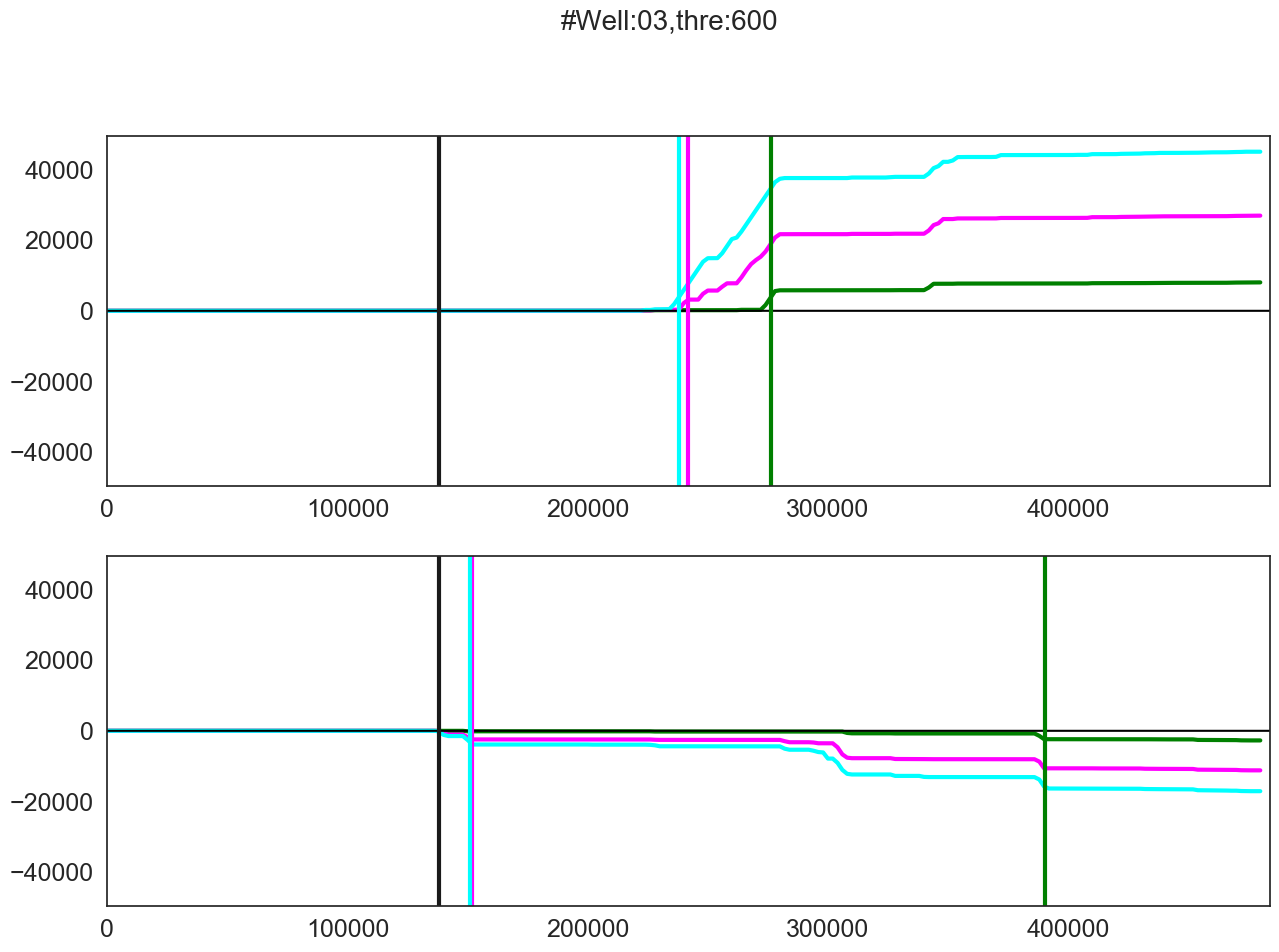

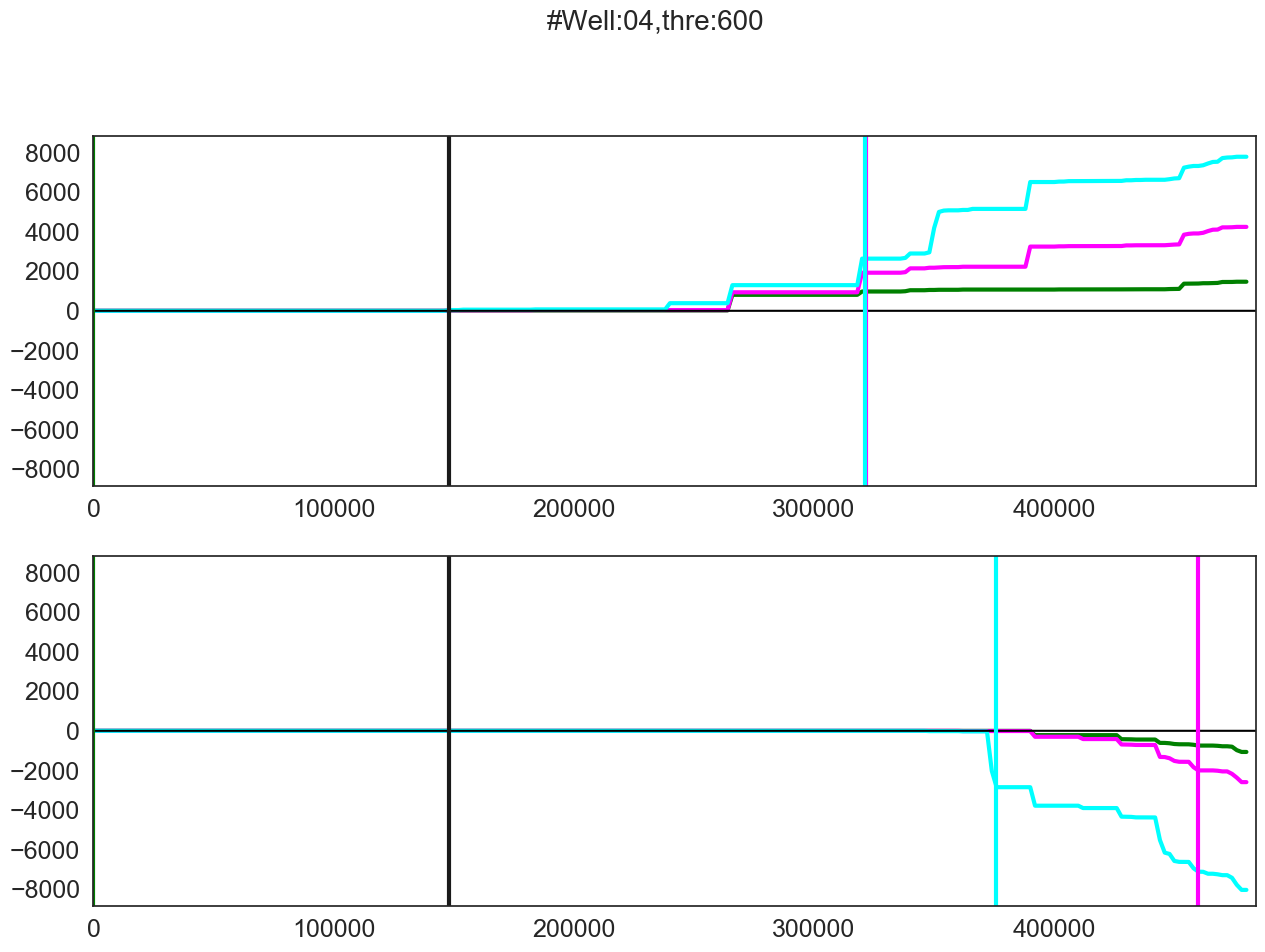

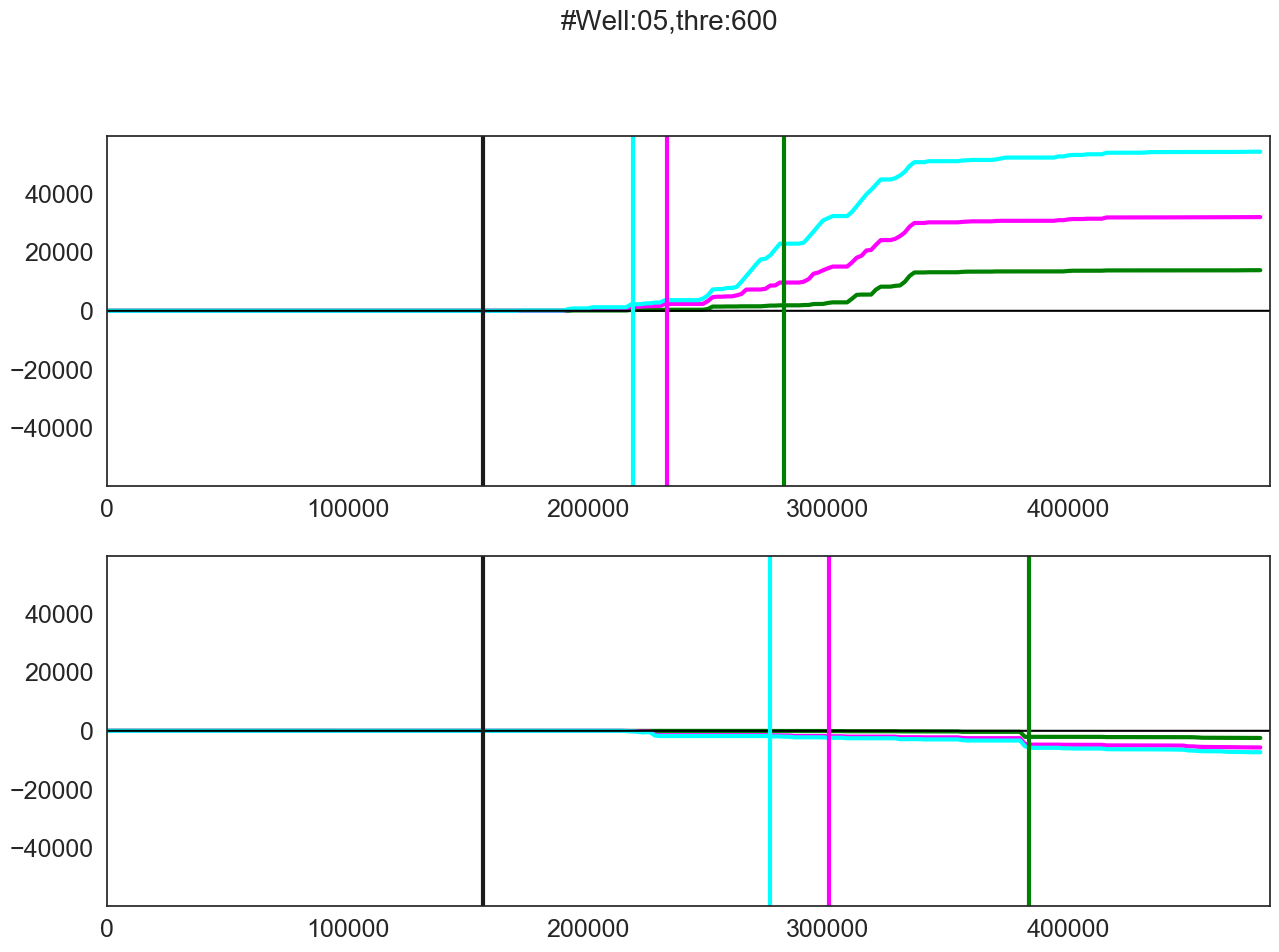

In [14]:
# eclosionの目視判定
eclo_time = {
            'w1118_1' : ['17:00:09', '19:53:18', '19:47:58', '21:24:47', '15:24:38', '19:39:20'],
            'w1118_2' : ['4:48:24', '20:1:57', '21:46:3', '5:17:2', '15:31:9','11:24:14'],
            'w1118_3' : ['2:17:11','2:30:46','21:0:15','20:18:22','14:50:57','2:35:20'],
            'OrR_1'   : ['3:17:17', '14:19:58', '11:32:9', '6:52:35', '11:29:47', '3:39:6'], 
            'OrR_2'   : ['11:19:30', '9:39:54', '10:2:29', '11:46:19', '9:49:48', '9:11:44'],
            'OrR_3'   : ['8:27:54','7:35:22','8:25:0','0:31:12','11:30:37','9:13:10'],
            'CS_1'    : ['12:9:6', '16:53:56', '14:16:44', '16:12:37', '13:11:6', '18:30:31'],
            'CS_2'    : ['16:11:28', '9:15:34', '0:0:0', '12:47:55', '13:42:40', '14:27:52'],
            'CS_3'    : ['12:5:21','12:44:23','6:41:34','11:26:11','11:6:31','8:3:1'],
            }

# 被接近対象の半径Xピクセル内に進入した回数をカウント
def count_entering(dl,dr,thre):
    ind1=np.where(dl<=thre)[0]
    ind2=np.where(dr<=thre)[0]
    x1=np.zeros(len(dl))
    x2=np.zeros(len(dl))
    x1[ind1]=1
    x2[ind2]=-1
    n1=len(ind1)
    n2=len(ind2)
    return x1,x2,n1,n2

# グラフの整形のためのもの
def set_fontsize(ax,fontsize):
    itemsx=ax.get_xticklabels()
    itemsy=ax.get_yticklabels()
    for i in range(len(itemsx)):
        itemsx[i].set_fontsize(fontsize)
    for i in range(len(itemsy)):
        itemsy[i].set_fontsize(fontsize)

for target in tqdm(targets):
    data_dir = datasets[target]
    
    file_path = os.path.join("{}/{}/csv".format(local_data, data_dir))
    # 初期配置の重心座標の読み込み
    fs_dis = np.loadtxt("{}/fs_disper.csv".format(file_path), delimiter=",")
    
    with open(os.path.join(local_data, data_dir, 'mask_params.json')) as f:
        params = json.load(f)
    
    x = params['n-rows']
    y = params['n-clms']
    xlen = params['well-w']
    ylen = params['well-h']
    X = params['x']
    Y = params['y']
    
    data_dir = datasets[target]
    tar_mv = movies[target][1]

    tar_path = os.path.join('{}/{}/{}.mp4'.format(server_data, data_dir, tar_mv))

    # 前景用動画読み込みの設定
    movie = cv2.VideoCapture(tar_path)

    # 動画ファイル保存用の設定
    fps = int(movie.get(cv2.CAP_PROP_FPS))                         # 動画のFPSを取得
    
    wnum = x*y
                    
    eclo_frames=np.zeros(wnum)
    for eclo in range(len(eclo_time[target])):
        tmp=eclo_time[target][eclo]
        h,m,s=tmp.split(':')
        hs=np.int(h)*3600
        ms=np.int(m)*60
        ss=np.int(s)
        alls=hs+ms+ss
        eclo_frames[eclo]=alls*fps
    
    fs_dis = fs_dis.reshape(x*y, 2, 3)

    dl_mean=np.zeros(wnum)
    dl_std=np.zeros(wnum)
    dr_mean=np.zeros(wnum)
    dr_std=np.zeros(wnum)
    distances=pd.DataFrame()

    n1s=np.array([])
    n2s=np.array([])

    # グラフ描画の範囲指定    
    dt_pre=3600*1 # eclosionから前1時間分
    dt_post=3600*20 # eclosion後20時間分
    dframe_pre=dt_pre*fps
    dframe_post=dt_post*fps

    disp_short=2
    # ********************************************
    #x = 1
    #y = 1
    
    arr_all=np.array([])
    #count_thres = [300,400,500,600]
    count_thres = [600]
    onset_frames = np.zeros((len(count_thres),wnum))
    onset_labels = np.zeros_like(onset_frames)
    ccc = 0
    for count_thre in tqdm(count_thres):
        cntr=0
        icntr=0
        for i in tqdm(range(x)): # for image placement
            arrs=np.array([])
            jcntr=0    
            for j in tqdm(range(y)): # for image placement
                fig = plt.figure(figsize=(15,10))
                # 重心座標データの読み込み
                G = np.loadtxt(os.path.join(file_path, 'dispersion/well{:03}.csv'.format(cntr)), delimiter=",")
                disp_range=[eclo_frames[cntr]-dframe_pre,eclo_frames[cntr]+dframe_post]
                if disp_short==1:
                    f1=np.int(disp_range[0])
                    f2=np.int(disp_range[1])
                elif disp_short==2:
                    f1=np.int(disp_range[0])
                    f2=len(G)
                else:
                    f1=0
                    f2=len(G)

                wellnum=str(cntr).zfill(2)
                #fname=h+wellnum+'.csv'
                #dat=pd.read_csv(fname,header=None)
                #data=pd.DataFrame(dat.values,columns=['y-coord','x-coord'])

                oy,ox=G.T
                lx=fs_dis[cntr,1,0]
                ly=fs_dis[cntr,0,0]
                rx=fs_dis[cntr,1,2]
                ry=fs_dis[cntr,0,2]

                #ox=grav['center_x'].values
                #oy=grav['center_y'].values

                dl=((ox-lx)**2+(oy-ly)**2)**0.5
                dr=((ox-rx)**2+(oy-ry)**2)**0.5

                if cntr==0:
                    dls=dl
                    drs=dr
                else:
                    dls=np.c_[dls,dl]
                    drs=np.c_[drs,dr]

                #dl=((dat.values[:,0]-target_loc[cntr,0])**2+(dat.values[:,1]-target_loc[cntr,1])**2)**0.5
                #dr=((dat.values[:,0]-target_loc[cntr,2])**2+(dat.values[:,1]-target_loc[cntr,3])**2)**0.5

                dl_mean[cntr]=np.mean(dl)
                dl_std[cntr]=np.std(dl)
                dr_mean[cntr]=np.mean(dr)
                dr_std[cntr]=np.std(dr)

                w=np.ones(dl.size)*cntr
                df=pd.DataFrame(np.c_[dl,dr,w],columns=['dl','dr','well'])
                distances=pd.concat([distances,df])

                bias=(dl-dr)/(dl+dr)
                bias=pd.Series(bias)
                #bias=bias.rolling(window=30).mean()

                maxt=len(ox)
                sns.set(style="white", color_codes=True)

                xs=range(len(ox))
                # ***** Visualization *****
                #sns.jointplot(x='x-coord', y='y-coord', data=data, kind='kde') #kind=kde,hex
                fontsize=18

                # 保存先がそのままだと画像が上書きされるので注意！! 下の fname も変更
                if 0: # 滞在の時間分布の図を描画したい場合ここを1に。
                    #ax=sns.jointplot(x=ox[::10],y=oy[::10],
                    #                 xlim=(10,210),ylim=(10,210),kind='kde')
                    #fig = plt.figure()
                    ax = fig.add_subplot(111)

                    H = ax.hist2d(ox[f1:f2],oy[f1:f2], 
                                  bins=[np.linspace(0,210,84),np.linspace(0,210,84)],
                                  normed=True)
                    #ax.set_xlabel('x')
                    #ax.set_ylabel('y')
                    divider = mpl_toolkits.axes_grid1.make_axes_locatable(ax)
                    cax = divider.append_axes('right', '5%', pad='3%')             
                    ax.axis("off")
                    H[3].set_clim(0,1e-4)
                    ax.set_aspect('equal')
                    fig.colorbar(H[3],cax=cax)
                    #cbar.set_label("color bar", fontname="Times New Roman", fontsize=10)

                    #plt.title('#Well:'+wellnum,fontsize=fontsize)


                else:              
                    bias_thre=0.5 # Bias value

                    # *** row1 ***
                    thres=[15,20,25]
                    if cntr==0:
                        onset_frames1=np.zeros((wnum,len(thres)))
                        onset_frames2=np.zeros((wnum,len(thres)))
                    xxl=np.zeros((len(thres),len(dl)))
                    xxr=np.zeros((len(thres),len(dr)))
                    nn1=np.zeros(len(thres))
                    nn2=np.zeros(len(thres))
                    for ii in range(len(thres)):
                        xxl[ii,f1:f2],xxr[ii,f1:f2],nn1[ii],nn2[ii]=count_entering(dl[f1:f2],dr[f1:f2],thres[ii])
                    if cntr==0:
                        n1s=nn1
                        n2s=nn2

                    else:
                        n1s=np.c_[n1s,nn1]
                        n2s=np.c_[n2s,nn2]

                    cs=['green','magenta','cyan','orange']
                    ax=plt.subplot2grid((2,1),(0,0),colspan=4)
                    
                    tmpmax=np.zeros_like(thres*2)
                    for ii in range(len(thres)):
                        d1=np.cumsum(xxl[ii])
                        d2=np.cumsum(xxr[ii])
                        ind_l=np.where(xxl[ii]==+1)[0]
                        ind_r=np.where(xxr[ii]==-1)[0]

                        lv,b=np.histogram(ind_l,bins=range(0,maxt,2000))
                        rv,b=np.histogram(ind_r,bins=range(0,maxt,2000))
                        
                        plotdata1=np.cumsum(lv)
                        plotdata2=np.cumsum(rv)
                        tmpmax[2*ii]=np.max(np.abs(plotdata1))
                        tmpmax[2*ii+1]=np.max(np.abs(plotdata2))
                    
                    #count_thre = 900
                    if 0:
                        for ii in range(len(thres)):
                            d1=np.cumsum(xxl[ii])
                            #d2=np.cumsum(xxr[ii])
                            lp=plt.plot(xs, d1, color=cs[ii],linewidth=3)
                            enter_count_thre=count_thre*fps
                            ind=np.where(d1>enter_count_thre)[0]
                            if len(ind)==0:
                                onset_frames1[cntr,ii]=0
                            else:
                                onset_frames1[cntr,ii]=ind[0]
                    else:
                        #tmpmax=np.zeros_like(thres)
                        for ii in range(len(thres)):
                            d1=np.cumsum(xxl[ii])

                            ind_l=np.where(xxl[ii]==+1)[0]
                            #ind_r=np.where(xxr[ii]==-1)[0]

                            lv,b=np.histogram(ind_l,bins=range(0,maxt,2000))
                            #plt.plot(b[:-1],lv,linewidth=3,color=cs[ii])
                            #rv,b=np.histogram(ind_r,bins=range(0,f2-f1,2000))
                            #plt.plot(b[:-1],-rv,linewidth=3,color=cs[ii])
                            #plt.plot(b[:-1],-rv+lv,linewidth=3,color=cs[ii])
                            #tmpmax[ii]=np.max(np.abs(lv))

                            plotdata=np.cumsum(lv)
                            plt.plot(b[:-1],np.cumsum(lv),linewidth=3,color=cs[ii])
                            #tmpmax[ii]=np.max(np.abs(plotdata))


                            enter_count_thre=count_thre*fps
                            ind=np.where(d1>enter_count_thre)[0]
                            if len(ind)==0:
                                onset_frames1[cntr,ii]=0
                            else:
                                onset_frames1[cntr,ii]=ind[0]

                    #ymax=np.max(np.abs(np.cumsum(xx[-1])))
                    ymax=np.max(tmpmax)
                    #ymax=40000
                    plt.plot(xs, np.zeros(len(xs)), color='black')
                    plt.ylim([-ymax*1.1,ymax*1.1])
                    for ii in range(len(thres)):        
                        plt.plot([onset_frames1[cntr,ii],onset_frames1[cntr,ii]],
                                 [-ymax*1.1,ymax*1.1],color=cs[ii],linewidth=3)

                    plt.plot([eclo_frames[cntr],eclo_frames[cntr]],[-ymax*1.1,ymax*1.1],
                            color='k',linewidth=3)
                    plt.xlim((-1,maxt+1))

                    #plt.title('Cumsum of count entering L-circle (G:15,M:20,C:25 pixel)',fontsize=fontsize)
                    set_fontsize(ax,fontsize)
                    if disp_short==1:
                        plt.xlim(disp_range)

                    # *** row2 ***
                    cs=['green','magenta','cyan','orange']
                    ax=plt.subplot2grid((2,1),(1,0),colspan=4)
                    if 0:
                        for ii in range(len(thres)):
                            d2=np.cumsum(xxr[ii])
                            lp=plt.plot(xs, d2, color=cs[ii],linewidth=3)
                            enter_count_thre2=-(count_thre*fps)
                            ind=np.where(d2<enter_count_thre2)[0]
                            if len(ind)==0:
                                onset_frames2[cntr,ii]=0
                            else:
                                onset_frames2[cntr,ii]=ind[0]
                    else:
                        #tmpmax=np.zeros_like(thres)
                        for ii in range(len(thres)):
                            d2=np.cumsum(xxr[ii])
                            ind_r=np.where(xxr[ii]==-1)[0]

                            #lv,b=np.histogram(ind_l,bins=range(0,f2-f1,2000))
                            #plt.plot(b[:-1],lv,linewidth=3,color=cs[ii])
                            rv,b=np.histogram(ind_r,bins=range(0,maxt,2000))
                            #plt.plot(b[:-1],-rv,linewidth=3,color=cs[ii])
                            #plt.plot(b[:-1],-rv+lv,linewidth=3,color=cs[ii])
                            #tmpmax[ii]=np.max(np.abs(rv))

                            plotdata=np.cumsum(-rv)
                            plt.plot(b[:-1],np.cumsum(-rv),linewidth=3,color=cs[ii])
                            #tmpmax[ii]=np.max(np.abs(plotdata))


                            enter_count_thre2=-(count_thre*fps)
                            ind=np.where(d2<enter_count_thre2)[0]
                            if len(ind)==0:
                                onset_frames2[cntr,ii]=0
                            else:
                                onset_frames2[cntr,ii]=ind[0]

                    #ymax=np.max(np.abs(np.cumsum(xx[-1])))
                    ymax=np.max(tmpmax)
                    #ymax=40000
                    plt.plot(xs, np.zeros(len(xs)), color='black')
                    plt.ylim([-ymax*1.1,ymax*1.1])
                    for ii in range(len(thres)):        
                        plt.plot([onset_frames2[cntr,ii],onset_frames2[cntr,ii]],
                                 [-ymax*1.1,ymax*1.1],color=cs[ii],linewidth=3)

                    plt.plot([eclo_frames[cntr],eclo_frames[cntr]],[-ymax*1.1,ymax*1.1],
                            color='k',linewidth=3)
                    plt.xlim((-1,maxt+1))
                    #plt.title('Cumsum of count entering L-circle (G:15,M:20,C:25 pixel)',fontsize=fontsize)
                    set_fontsize(ax,fontsize)
                    if disp_short==1:
                        plt.xlim(disp_range)


                    '''
                    yl=np.max([np.max(nn1),np.max(nn2)])*1.1
                    for ii in range(len(thres)):
                        ax=plt.subplot2grid((3,4),(2,0+ii))
                        plt.bar([0,1],[nn1[ii],nn2[ii]],color=cs[ii])
                        set_fontsize(ax,fontsize)
                        ax.set_xticks([0,1])
                        ax.set_xticklabels(['L','R'],fontsize=fontsize)
                        ax.set_ylim([0,yl])
                    '''

                #sys.exit()
                # *************************
                
                if onset_frames1[cntr,2] > onset_frames2[cntr,2]:
                    onset_frames[ccc,cntr] = onset_frames2[cntr,2]
                    onset_labels[ccc,cntr] = -1
                else:
                    onset_frames[ccc,cntr] = onset_frames1[cntr,2]
                    onset_labels[ccc,cntr] = 1

                # 滞在分布を出力する時はここも１に
                if 0:
                    fname = os.path.join(local_data,data_dir,'img2')
                else:
                    fname = os.path.join(local_data,data_dir,'img_cut2/th{:03}'.format(count_thre*fps))
                os.makedirs(fname, exist_ok=True)
                imfname = fname+'/well{}.png'.format(wellnum)
                plt.savefig(imfname)
                arr=np.array(Image.open(imfname))
                if jcntr==0: arrs=arr
                else: arrs=np.hstack((arrs,arr))
                jcntr+=1

                plt.suptitle('#Well:'+wellnum+',thre:{}'.format(count_thre),verticalalignment='bottom',fontsize=20)        

                #plt.tight_layout()
                #plt.show()

                cntr+=1
            if icntr==0: arr_all=arrs
            else: arr_all=np.vstack((arr_all,arrs))
            icntr+=1

        pil_img = Image.fromarray(arr_all)
        pil_img.save(os.path.join(fname,'img-summary.png'))
        ccc+=1
    
#plt.figure(figsize=(15, 15))
#ax = sns.violinplot(x=distances['well'], y=pkmn["dr"], split=True) 

print('done.')

#### fs_dis[0,:,1]

In [12]:
eclo_frames[0]

51912.0

In [110]:
G = np.loadtxt(os.path.join(file_path, 'dispersion/well{:03}.csv'.format(0)), delimiter=",")

In [113]:
G[200000]

array([106.710843, 107.927711])

In [48]:
maxt

740829

In [46]:
f2-f1

226800

In [45]:
np.where(xxl[0]!=0)

(array([ 52275,  52276,  65182, ..., 265980, 265981, 265982]),)

羽化時間との差の計算

In [11]:
tdiffs_frame = []
tdiffs = []
thre_num = len(count_thres)

for j in range(thre_num):
    tdiff_frame = (onset_frames[j] - eclo_frames) / fps / 3600
    times = []
    for i in range(x*y):
        if tdiff_frame[i] > 0:
            hour_ = math.floor(tdiff_frame[i])
            min_ = math.floor((tdiff_frame[i]-hour_)*60)
            sec_ = math.floor((((tdiff_frame[i]-hour_)*60-min_))*60)
            time_ = str(hour_) + ':' + str(min_) + ':' + str(sec_)
            times.append(time_)

        else:
            tdiff_frame[i] = 0
            times.append('0:0:0')

    tdiffs_frame.append(tdiff_frame)
    tdiffs.append(times)

グラフ描画

In [12]:
plt.style.use('default')
sns.set()
sns.set_style('whitegrid')
sns.set_palette('Set1')

x = np.array([0,1,2,3,4,5])

df = pd.DataFrame({
    'x': x, 'thre300': tdiffs_frame[0], 'thre400': tdiffs_frame[1], 'thre500': tdiffs_frame[2], 'thre600': tdiffs_frame[3]
})

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.plot('x', 'thre300', data=df, label='thre 300')
ax.plot('x', 'thre400', data=df, label='thre 400')
ax.plot('x', 'thre500', data=df, label='thre 500')
ax.plot('x', 'thre600', data=df, label='thre 600')

ymax = 12

for i in range(len(tdiffs_frame)):
    for j in range(len(tdiffs_frame[i])):
        if i==0:
            if onset_labels[i][j]==1:
                ax.scatter(x=j, y=tdiffs_frame[i][j], s=70, c='red', marker='o')
            else:
                ax.scatter(x=j, y=tdiffs_frame[i][j], s=70, c='red', marker=',')
        elif i==1:
            if onset_labels[i][j]==1:
                ax.scatter(x=j, y=tdiffs_frame[i][j], s=60, c='blue', marker='o')
            else:
                ax.scatter(x=j, y=tdiffs_frame[i][j], s=60, c='blue', marker=',')
        elif i==2:
            if onset_labels[i][j]==1:
                ax.scatter(x=j, y=tdiffs_frame[i][j], s=50, c='green', marker='o')
            else:
                ax.scatter(x=j, y=tdiffs_frame[i][j], s=50, c='green', marker=',')
        elif i==3:
            if onset_labels[i][j]==1:
                ax.scatter(x=j, y=tdiffs_frame[i][j], s=40, c='orange', marker='o')
            else:
                ax.scatter(x=j, y=tdiffs_frame[i][j], s=40, c='orange', marker=',')
    
    array_max = max(tdiffs_frame[i])
    if array_max > ymax:
        ymax = round(array_max)
            
ax.legend()
ax.set_xlabel("#well")
ax.set_ylabel("time [hour]")
ax.set_ylim(0, ymax)

fname = os.path.join(local_data,data_dir,'img')
os.makedirs(fname, exist_ok=True)
imfname = fname+'/graph2.png'.format()
plt.savefig(imfname)

plt.show()

IndexError: list index out of range

左右で分割


done.


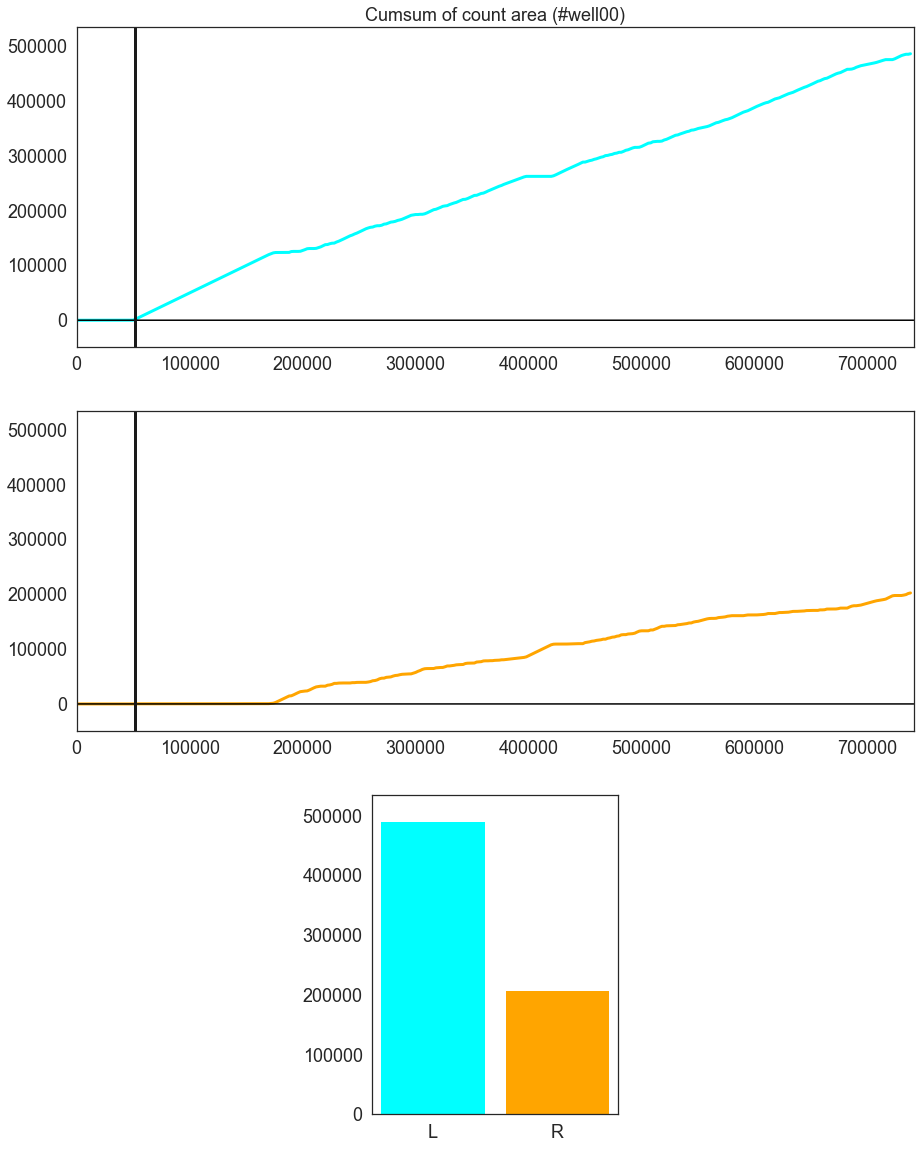

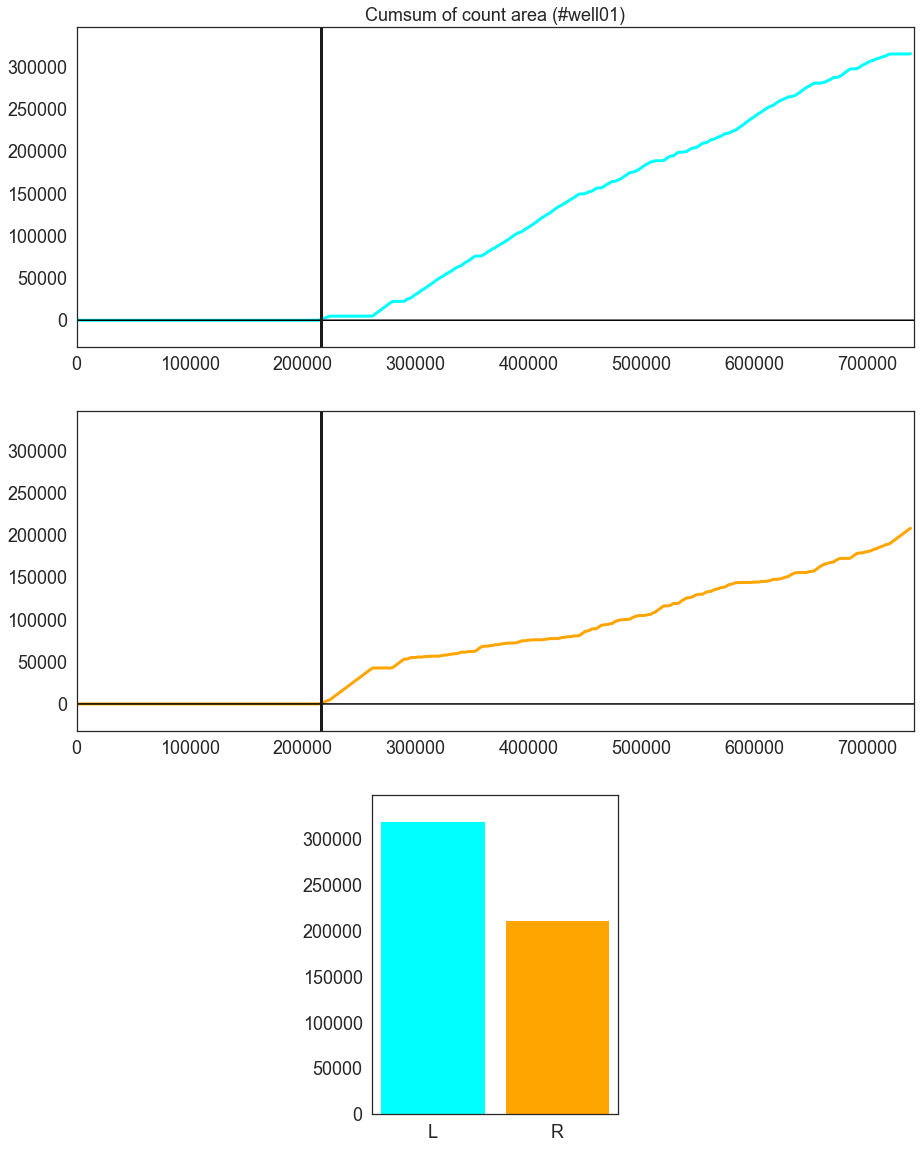

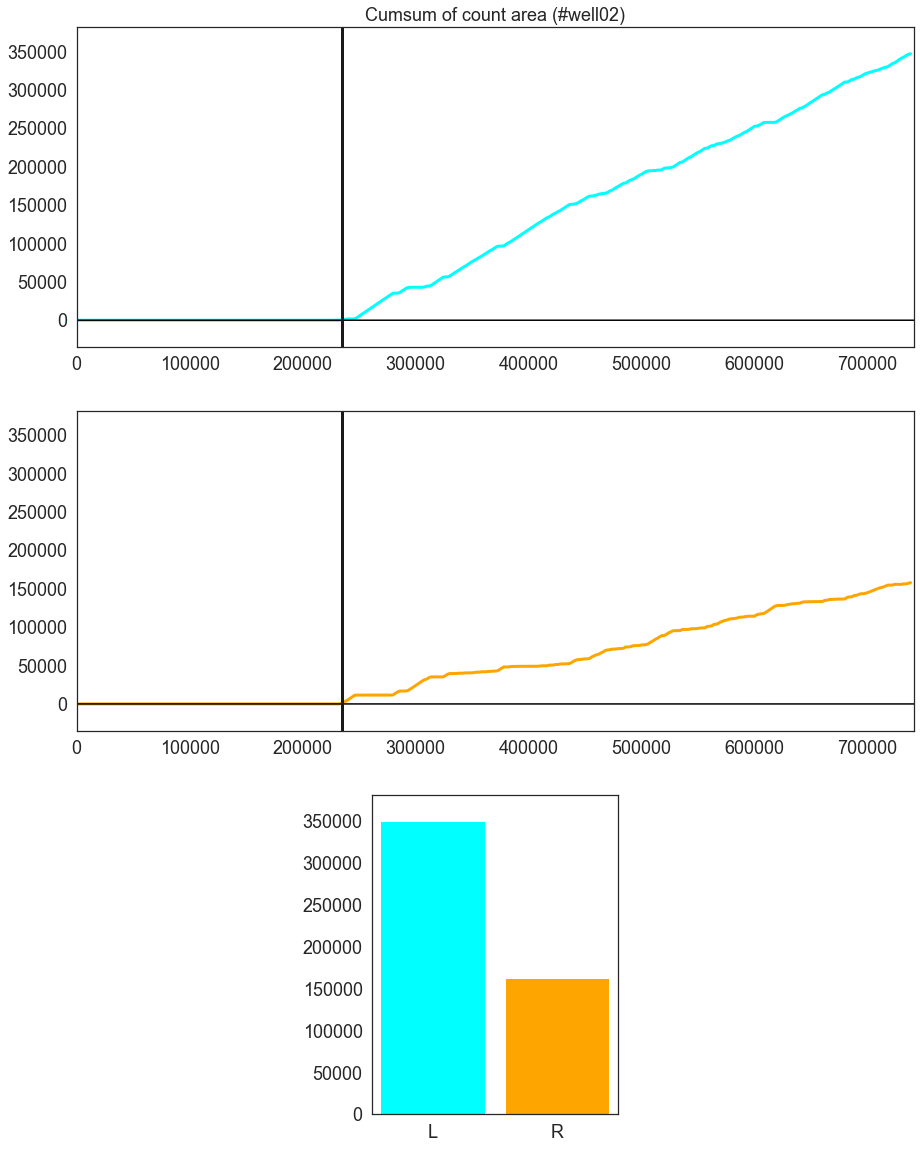

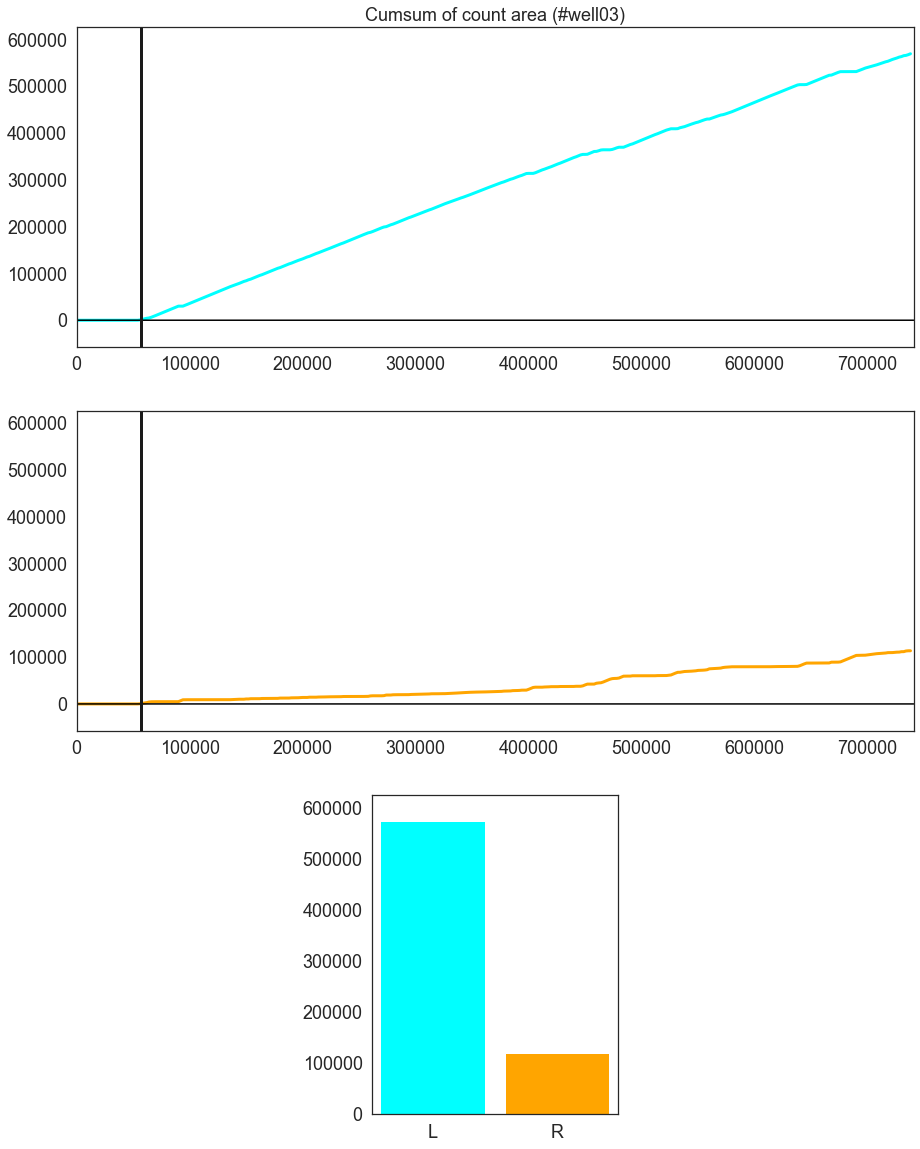

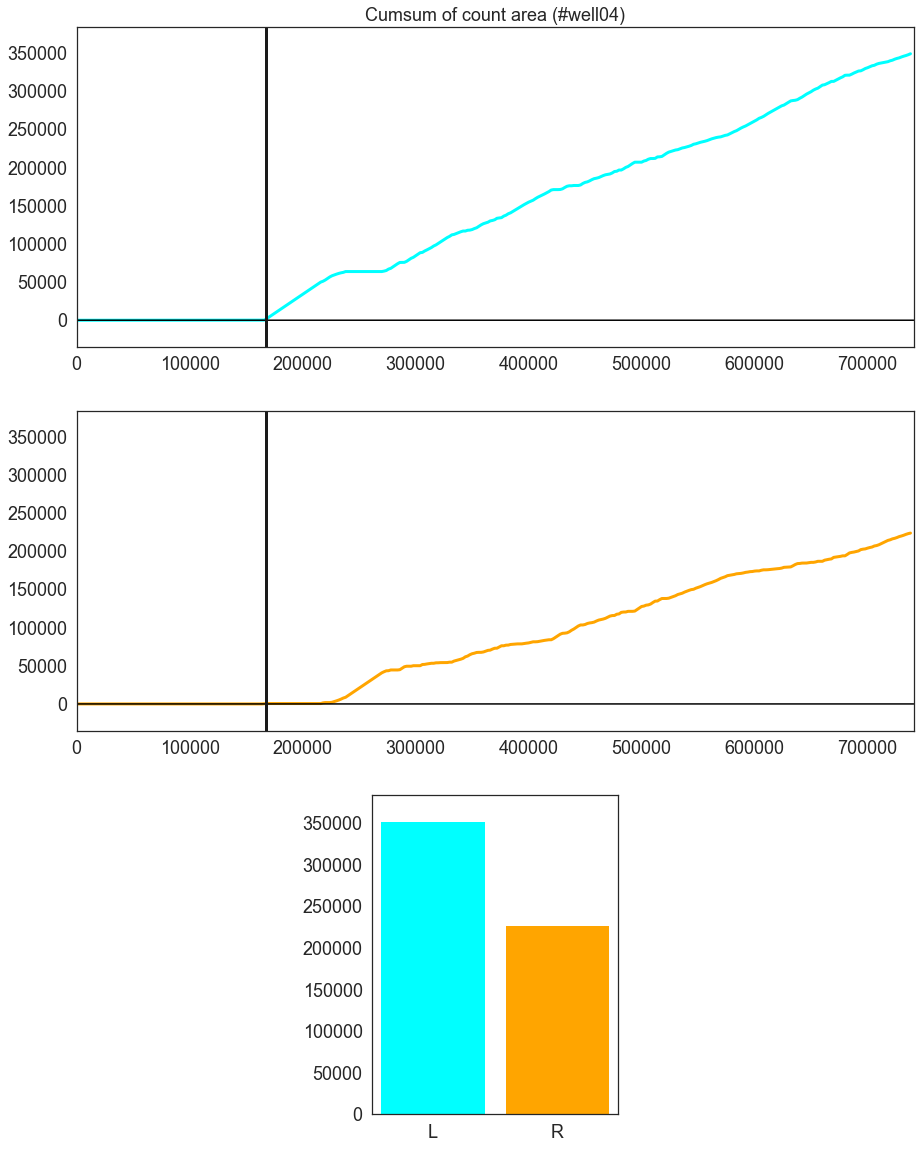

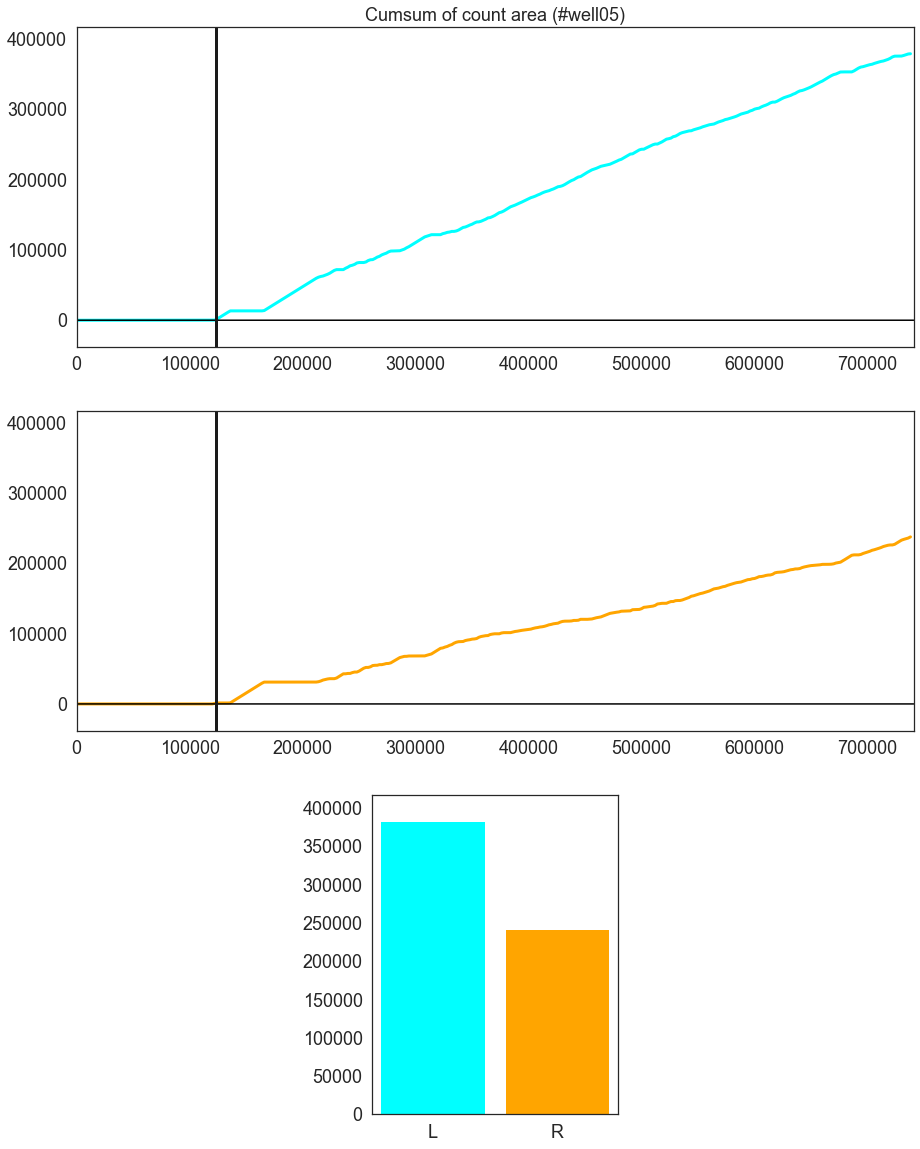

In [4]:
# eclosionの目視判定
eclo_time = {
            'w1118_1' : ['17:00:09', '19:53:18', '19:47:58', '21:24:47', '15:24:38', '19:39:20'],
            'w1118_2' : ['4:48:24', '20:1:57', '21:46:3', '5:17:2', '15:31:9','11:24:14'],
            'w1118_3' : ['2:17:11','2:30:46','21:0:15','20:18:22','14:50:57','2:35:20'],
            'OrR_1'   : ['3:17:17', '14:19:58', '11:32:9', '6:52:35', '11:29:47', '3:39:6'], 
            'OrR_2'   : ['11:19:30', '9:39:54', '10:2:29', '11:46:19', '9:49:48', '9:11:44'],
            'OrR_3'   : ['8:27:54','7:35:22','8:25:0','0:31:12','11:30:37','9:13:10'],
            'CS_1'    : ['12:9:6', '16:53:56', '14:16:44', '16:12:37', '13:11:6', '18:30:31'],
            'CS_2'    : ['16:11:28', '9:15:34', '0:0:0', '12:47:55', '13:42:40', '14:27:52'],
            'CS_3'    : ['12:5:21','12:44:23','6:41:34','11:26:11','11:6:31','8:3:1'],
            }

# 標的個体がウェル内のどちら側にいるかをカウント
def count_area(Gx,thre,fps):
    ind1=np.where(Gx<=thre)[0]
    ind2=np.where(Gx>thre)[0]
    x1=np.zeros(len(Gx),dtype='int')
    x2=np.zeros(len(Gx),dtype='int')
    eclo=3600*fps
    x1[ind1]=1
    x2[ind2]=1
    x1[range(eclo)]=0
    x2[range(eclo)]=0
    ind3=np.where(x1==1)[0]
    ind4=np.where(x2==1)[0]
    n1=len(ind3)
    n2=len(ind4)
    return x1,x2,n1,n2

def count_area_all(Gx,thre,eclo):
    ind1=np.where(Gx<=thre)[0]
    ind2=np.where(Gx>thre)[0]
    x1=np.zeros(len(Gx),dtype='int')
    x2=np.zeros(len(Gx),dtype='int')
    x1[ind1]=1
    x2[ind2]=1
    x1[range(int(eclo))]=0
    x2[range(int(eclo))]=0
    ind3=np.where(x1==1)[0]
    ind4=np.where(x2==1)[0]
    n1=len(ind3)
    n2=len(ind4)
    return x1,x2,n1,n2

# グラフの整形のためのもの
def set_fontsize(ax,fontsize):
    itemsx=ax.get_xticklabels()
    itemsy=ax.get_yticklabels()
    for i in range(len(itemsx)):
        itemsx[i].set_fontsize(fontsize)
    for i in range(len(itemsy)):
        itemsy[i].set_fontsize(fontsize)

for target in tqdm(targets):
    data_dir = datasets[target]
    
    file_path = os.path.join("{}/{}/csv".format(local_data, data_dir))
    # 初期配置の重心座標の読み込み
    fs_dis = np.loadtxt("{}/fs_disper.csv".format(file_path), delimiter=",")
    
    with open(os.path.join(local_data, data_dir, 'mask_params.json')) as f:
        params = json.load(f)
    
    x = params['n-rows']
    y = params['n-clms']
    xlen = params['well-w']
    ylen = params['well-h']
    X = params['x']
    Y = params['y']
    
    data_dir = datasets[target]
    tar_mv = movies[target][1]

    tar_path = os.path.join('{}/{}/{}.mp4'.format(server_data, data_dir, tar_mv))

    # 前景用動画読み込みの設定
    movie = cv2.VideoCapture(tar_path)

    # 動画ファイル保存用の設定
    fps = int(movie.get(cv2.CAP_PROP_FPS))                         # 動画のFPSを取得
    
    wnum = x*y
                    
    eclo_frames=np.zeros(wnum)
    for eclo in range(len(eclo_time[target])):
        tmp=eclo_time[target][eclo]
        h,m,s=tmp.split(':')
        hs=np.int(h)*3600
        ms=np.int(m)*60
        ss=np.int(s)
        alls=hs+ms+ss
        eclo_frames[eclo]=alls*fps
    
    fs_dis = fs_dis.reshape(x*y, 2, 3)

    # グラフ描画の範囲指定    
    dt_pre=3600*1 # eclosionから前1時間分
    dt_post=3600*20 # eclosion後20時間分
    dframe_pre=dt_pre*fps
    dframe_post=dt_post*fps

    disp_short=0
    
    # ********************************************
    #wnum = 1
    fontsize=18
   
    for i in tqdm(range(wnum)):
        fig = plt.figure(figsize=(15,20))
        lx=fs_dis[i,1,0]
        rx=fs_dis[i,1,2]
        x_mean = (lx+rx)/2
        G = np.loadtxt(os.path.join(file_path, 'dispersion3/well{:03}.csv'.format(i)), delimiter=",")
        #G = np.loadtxt(os.path.join(file_path1, 'dispersion3/well{:03}.csv'.format(cntr)), delimiter=",")
        #xxl=np.zeros((len(G)),dtype='int')
        #xxr=np.zeros((len(G)),dtype='int')
        disp_range=[int(eclo_frames[i]-dframe_pre),int(eclo_frames[i]+dframe_post)]
        if disp_short==1:
            f1=np.int(disp_range[0])
            f2=np.int(disp_range[1])
        elif disp_short == 2:
            f1=np.int(disp_range[0])
            f2=len(G)
        else:
            f1=0
            f2=len(G)
        if disp_short == 1:
            xxl,xxr,nl,nr = count_area(G[disp_range[0]:disp_range[1],1],x_mean,fps)
        elif disp_short == 2:
            xxl,xxr,nl,nr = count_area(G[disp_range[0]:,1],x_mean,fps)            
        else:
            xxl,xxr,nl,nr = count_area_all(G[:,1],x_mean,eclo_frames[i])
        
        maxt=len(xxl)
        sns.set(style="white", color_codes=True)
        
        xs=range(len(xxl))
        
        # *** row1 ***
        ax=plt.subplot2grid((3,1),(0,0),colspan=4)
            
        if 0:
            d1=np.cumsum(xxl)
            d2=np.cumsum(xxr)
            lp=plt.plot(xs, d1, color='cyan',linewidth=3)
            '''
            enter_count_thre=count_thre*fps
            ind=np.where(d1>enter_count_thre)[0]
            if len(ind)==0:
                onset_frames1[cntr,ii]=0
            else:
                onset_frames1[cntr,ii]=ind[0]
            '''
        else:
            #tmpmax=np.zeros_like(thres)
            
            d1=np.cumsum(xxl)
            d2=np.cumsum(xxr)
            ind_l=np.where(xxl==+1)[0]
            ind_r=np.where(xxr==+1)[0]

            lv,b1=np.histogram(ind_l,bins=range(0,f2-f1,2000))
            #plt.plot(b[:-1],lv,linewidth=3,color=cs[ii])
            rv,b2=np.histogram(ind_r,bins=range(0,f2-f1,2000))
            #plt.plot(b[:-1],-rv,linewidth=3,color=cs[ii])
            #plt.plot(b[:-1],-rv+lv,linewidth=3,color=cs[ii])
            #tmpmax[ii]=np.max(np.abs(lv))

            plotdata1=np.cumsum(lv)
            plotdata2=np.cumsum(rv)
            plt.plot(b1[:-1],np.cumsum(lv),linewidth=3,color='cyan')
            tmpmax1=np.max(np.abs(plotdata1))
            tmpmax2=np.max(np.abs(plotdata2))

            '''
            enter_count_thre=count_thre*fps
            ind=np.where(d1>enter_count_thre)[0]
            if len(ind)==0:
                onset_frames1[cntr]=0
            else:
                onset_frames1[cntr]=ind[0]
            '''

        #ymax=np.max(np.abs(np.cumsum(xx[-1])))
        if tmpmax1 >= tmpmax2:
            tmpmax = tmpmax1
        else:
            tmpmax = tmpmax2
        ymax=np.max(tmpmax)
        plt.plot(xs, np.zeros(len(xs)), color='black')
        plt.ylim([-ymax*0.1,ymax*1.1])
        #plt.ylim([-ymax*1.1,ymax*1.1])
        #plt.plot([onset_frames1[cntr,ii],onset_frames1[cntr,ii]],[-ymax*1.1,ymax*1.1],color=cs[ii],linewidth=3)

        plt.plot([eclo_frames[i],eclo_frames[i]],[-ymax*1.1,ymax*1.1],color='k',linewidth=3)
        plt.xlim((-1,maxt+1))

        plt.title('Cumsum of count area (#well{:02})'.format(i),fontsize=fontsize)
        set_fontsize(ax,fontsize)
        if disp_short==2:
            plt.xlim(f1,f2)
        
        # *** row2 ***
        ax=plt.subplot2grid((3,1),(1,0),colspan=4)
            
        if 0:
            d1=np.cumsum(xxl)
            d2=np.cumsum(xxr)
            lp=plt.plot(xs, d2, color='orange',linewidth=3)
            '''
            enter_count_thre=count_thre*fps
            ind=np.where(d1>enter_count_thre)[0]
            if len(ind)==0:
                onset_frames1[cntr,ii]=0
            else:
                onset_frames1[cntr,ii]=ind[0]
            '''
        else:
            #tmpmax=np.zeros_like(thres)
            
            d1=np.cumsum(xxl)
            d2=np.cumsum(xxr)
            ind_l=np.where(xxl==+1)[0]
            ind_r=np.where(xxr==+1)[0]

            lv,b1=np.histogram(ind_l,bins=range(0,f2-f1,2000))
            #plt.plot(b[:-1],lv,linewidth=3,color=cs[ii])
            rv,b2=np.histogram(ind_r,bins=range(0,f2-f1,2000))
            #plt.plot(b[:-1],-rv,linewidth=3,color=cs[ii])
            #plt.plot(b[:-1],-rv+lv,linewidth=3,color=cs[ii])
            #tmpmax[ii]=np.max(np.abs(lv))

            plotdata1=np.cumsum(lv)
            plotdata2=np.cumsum(rv)
            plt.plot(b2[:-1],np.cumsum(rv),linewidth=3,color='orange')
            #tmpmax=np.max(np.abs(plotdata1),np.abs(plotdata2))

            '''
            enter_count_thre=count_thre*fps
            ind=np.where(d1>enter_count_thre)[0]
            if len(ind)==0:
                onset_frames1[cntr]=0
            else:
                onset_frames1[cntr]=ind[0]
            '''

        #ymax=np.max(np.abs(np.cumsum(xx[-1])))
        ymax=np.max(tmpmax)
        plt.plot(xs, np.zeros(len(xs)), color='black')
        #plt.ylim([-ymax*1.1,ymax*1.1])
        plt.ylim([-ymax*0.1,ymax*1.1])
        #plt.plot([onset_frames1[cntr,ii],onset_frames1[cntr,ii]],[-ymax*1.1,ymax*1.1],color=cs[ii],linewidth=3)

        plt.plot([eclo_frames[i],eclo_frames[i]],[-ymax*1.1,ymax*1.1],color='k',linewidth=3)
        plt.xlim((-1,maxt+1))

        #plt.title('Cumsum of count',fontsize=fontsize)
        set_fontsize(ax,fontsize)
        if disp_short==2:
            plt.xlim(f1,f2)

        # *** row3 ***
        yl=np.max([nl,nr])*1.1
        ax=plt.subplot2grid((3,3),(2,1))
        bar_list=plt.bar([0,1],[nl,nr],align="center",linewidth=4)
        bar_list[0].set_color('cyan')
        bar_list[1].set_color('orange')
        set_fontsize(ax,fontsize)
        ax.set_xticks([0,1])
        ax.set_xticklabels(['L','R'],fontsize=fontsize)
        ax.set_ylim([0,yl])
        
        fname = os.path.join(local_data,data_dir,'img/area')
        os.makedirs(fname, exist_ok=True)
        imfname = fname+'/well{}.png'.format(i)
        plt.savefig(imfname)
        arr=np.array(Image.open(imfname))
        if i<3:
            if i==0: arrs1=arr
            else: arrs1=np.hstack((arrs1,arr))
        else:
            if i==3: arrs2=arr
            else: arrs2=np.hstack((arrs2,arr))
    
    arr_all=np.vstack((arrs1,arrs2))
    pil_img = Image.fromarray(arr_all)
    pil_img.save(os.path.join(fname,'img-summary.png'))
    
print('done.')

被接近対象として蛹も追加


done.


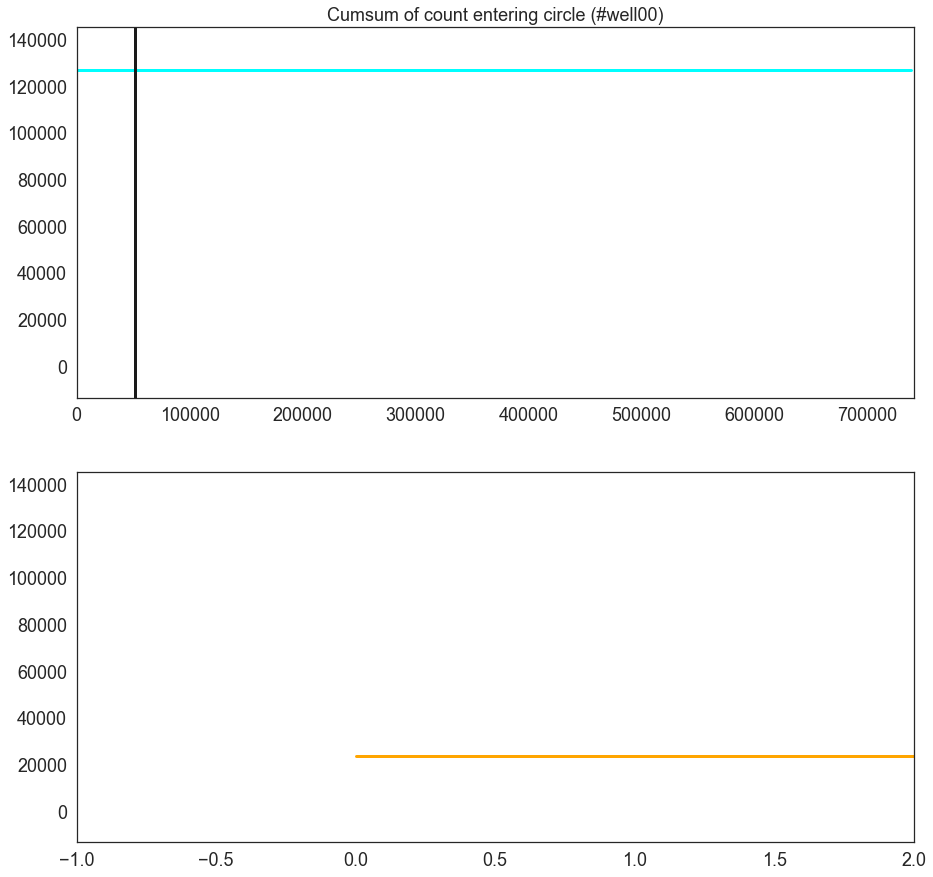

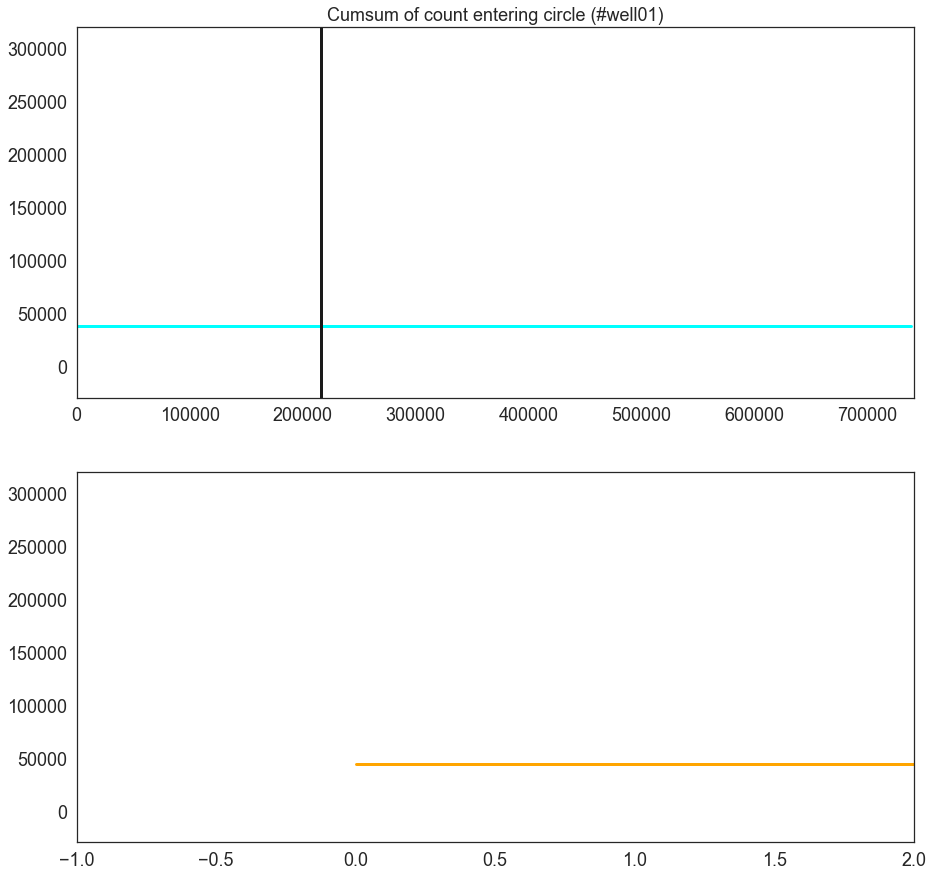

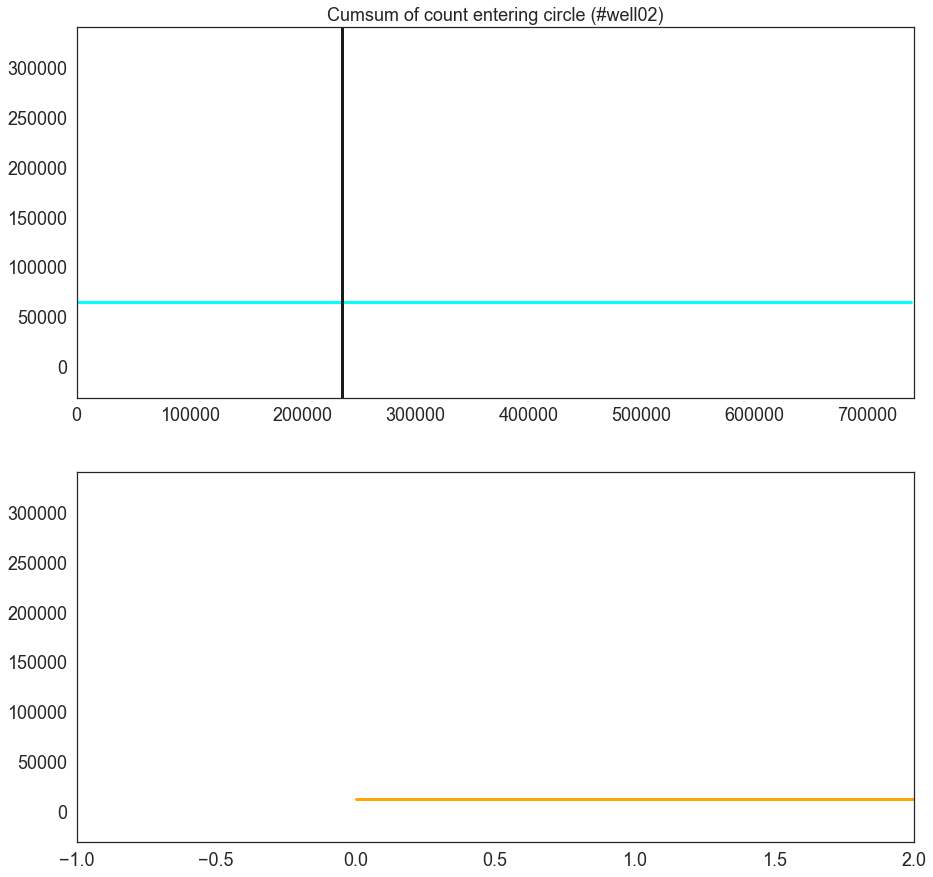

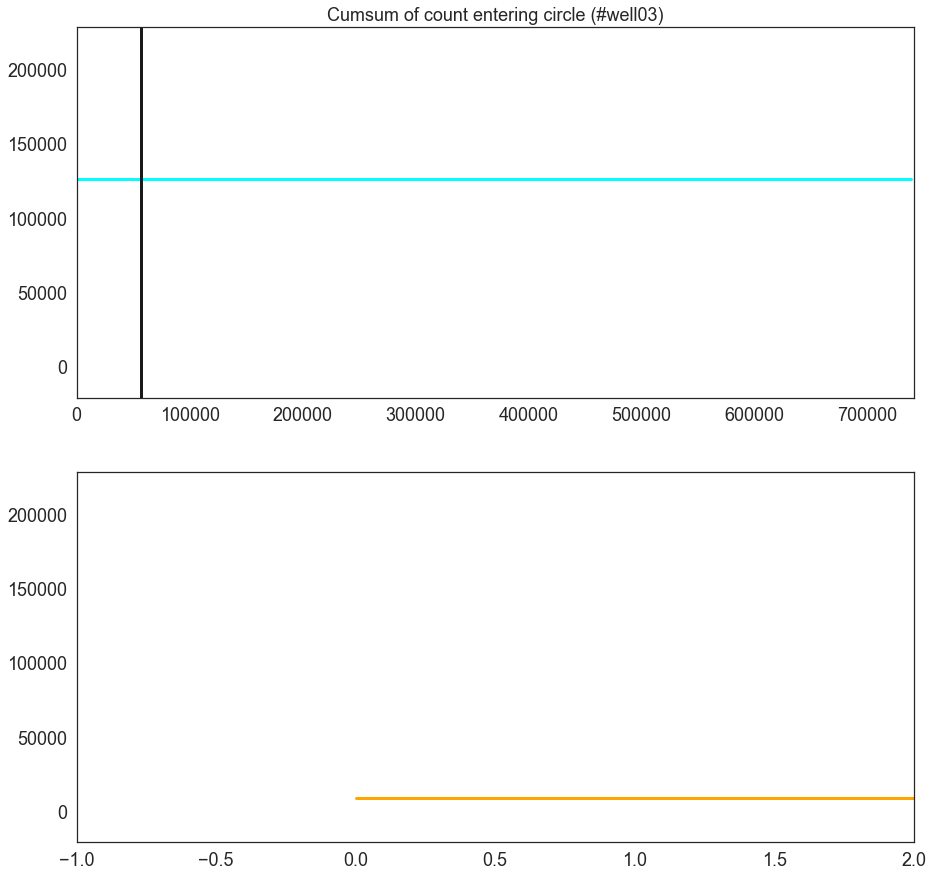

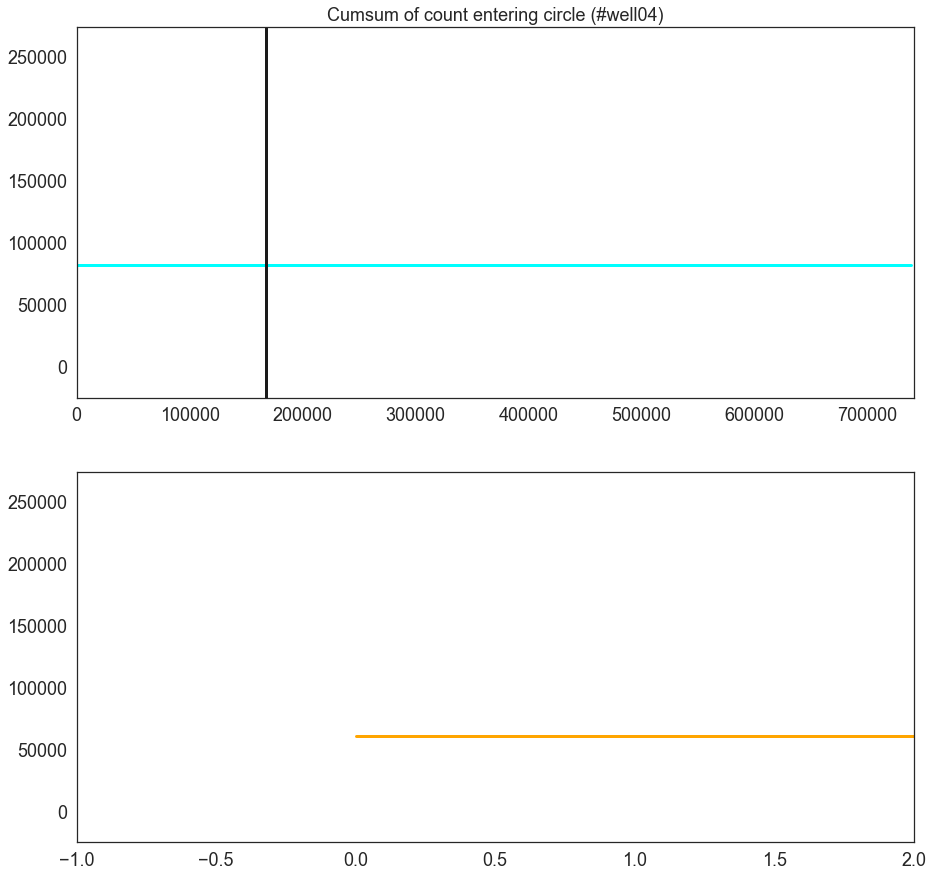

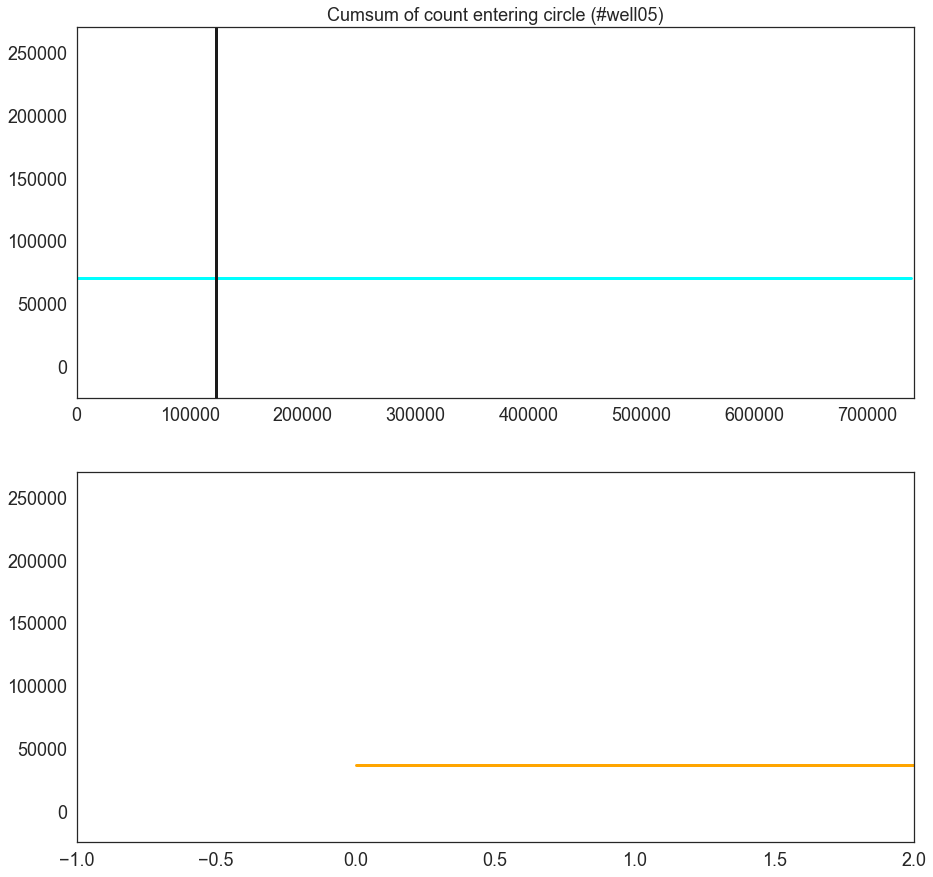

In [27]:
# eclosionの目視判定
eclo_time = {
            'w1118_1' : ['17:00:09', '19:53:18', '19:47:58', '21:24:47', '15:24:38', '19:39:20'],
            'w1118_2' : ['4:48:24', '20:1:57', '21:46:3', '5:17:2', '15:31:9','11:24:14'],
            'w1118_3' : ['2:17:11','2:30:46','21:0:15','20:18:22','14:50:57','2:35:20'],
            'OrR_1'   : ['3:17:17', '14:19:58', '11:32:9', '6:52:35', '11:29:47', '3:39:6'], 
            'OrR_2'   : ['11:19:30', '9:39:54', '10:2:29', '11:46:19', '9:49:48', '9:11:44'],
            'OrR_3'   : ['8:27:54','7:35:22','8:25:0','0:31:12','11:30:37','9:13:10'],
            'CS_1'    : ['12:9:6', '16:53:56', '14:16:44', '16:12:37', '13:11:6', '18:30:31'],
            'CS_2'    : ['16:11:28', '9:15:34', '0:0:0', '12:47:55', '13:42:40', '14:27:52'],
            'CS_3'    : ['12:5:21','12:44:23','6:41:34','11:26:11','11:6:31','8:3:1'],
            }

# 標的個体がウェル内のどちら側にいるかをカウント
def count_area(Gx,thre,fps):
    ind1=np.where(Gx<=thre)[0]
    ind2=np.where(Gx>thre)[0]
    x1=np.zeros(len(Gx),dtype='int')
    x2=np.zeros(len(Gx),dtype='int')
    eclo=3600*fps
    x1[ind1]=1
    x2[ind2]=1
    x1[range(eclo)]=0
    x2[range(eclo)]=0
    ind3=np.where(x1==1)[0]
    ind4=np.where(x2==1)[0]
    n1=len(ind3)
    n2=len(ind4)
    return x1,x2,n1,n2

def count_area_all(Gx,thre,eclo):
    ind1=np.where(Gx<=thre)[0]
    ind2=np.where(Gx>thre)[0]
    x1=np.zeros(len(Gx),dtype='int')
    x2=np.zeros(len(Gx),dtype='int')
    x1[ind1]=1
    x2[ind2]=1
    x1[range(int(eclo))]=0
    x2[range(int(eclo))]=0
    ind3=np.where(x1==1)[0]
    ind4=np.where(x2==1)[0]
    n1=len(ind3)
    n2=len(ind4)
    return x1,x2,n1,n2

# 被接近対象の半径Xピクセル内に進入した回数をカウント
def count_entering2(dl,dr,dp,thre):
    ind1=np.where(dl<=thre)[0]
    ind2=np.where(dr<=thre)[0]
    ind3=np.where(dp<=thre)[0]
    x1=np.zeros(len(dl))
    x2=np.zeros(len(dl))
    x3=np.zeros(len(dl))
    x1[ind1]=1
    x2[ind2]=1
    x3[ind3]=1
    n1=len(ind1)
    n2=len(ind2)
    n3=len(ind3)
    return x1,x2,x3,n1,n2,n3

# グラフの整形のためのもの
def set_fontsize(ax,fontsize):
    itemsx=ax.get_xticklabels()
    itemsy=ax.get_yticklabels()
    for i in range(len(itemsx)):
        itemsx[i].set_fontsize(fontsize)
    for i in range(len(itemsy)):
        itemsy[i].set_fontsize(fontsize)

for target in tqdm(targets):
    data_dir = datasets[target]
    
    file_path = os.path.join("{}/{}/csv".format(local_data, data_dir))
    # 初期配置の重心座標の読み込み
    fs_dis = np.loadtxt("{}/fs_disper.csv".format(file_path), delimiter=",")
    
    with open(os.path.join(local_data, data_dir, 'mask_params.json')) as f:
        params = json.load(f)
    
    x = params['n-rows']
    y = params['n-clms']
    xlen = params['well-w']
    ylen = params['well-h']
    X = params['x']
    Y = params['y']
    
    data_dir = datasets[target]
    tar_mv = movies[target][1]

    tar_path = os.path.join('{}/{}/{}.mp4'.format(server_data, data_dir, tar_mv))

    # 前景用動画読み込みの設定
    movie = cv2.VideoCapture(tar_path)

    # 動画ファイル保存用の設定
    fps = int(movie.get(cv2.CAP_PROP_FPS))                         # 動画のFPSを取得
    
    wnum = x*y
                    
    eclo_frames=np.zeros(wnum)
    for eclo in range(len(eclo_time[target])):
        tmp=eclo_time[target][eclo]
        h,m,s=tmp.split(':')
        hs=np.int(h)*3600
        ms=np.int(m)*60
        ss=np.int(s)
        alls=hs+ms+ss
        eclo_frames[eclo]=alls*fps
    
    fs_dis = fs_dis.reshape(x*y, 2, 3)
    
    dl_mean=np.zeros(wnum)
    dl_std=np.zeros(wnum)
    dr_mean=np.zeros(wnum)
    dr_std=np.zeros(wnum)
    distances=pd.DataFrame()

    n1s=np.array([])
    n2s=np.array([])

    # グラフ描画の範囲指定    
    dt_pre=3600*1 # eclosionから前1時間分
    dt_post=3600*20 # eclosion後20時間分
    dframe_pre=dt_pre*fps
    dframe_post=dt_post*fps

    disp_short=0
    
    # ********************************************
    #wnum = 1
    fontsize=18
   
    for i in tqdm(range(wnum)):
        fig = plt.figure(figsize=(15,15))
        G = np.loadtxt(os.path.join(file_path, 'dispersion3/well{:03}.csv'.format(i)), delimiter=",")
        #G = np.loadtxt(os.path.join(file_path1, 'dispersion3/well{:03}.csv'.format(cntr)), delimiter=",")
        #xxl=np.zeros((len(G)),dtype='int')
        #xxr=np.zeros((len(G)),dtype='int')
        disp_range=[int(eclo_frames[i]-dframe_pre),int(eclo_frames[i]+dframe_post)]
        if disp_short==1:
            f1=np.int(disp_range[0])
            f2=np.int(disp_range[1])
        elif disp_short == 2:
            f1=np.int(disp_range[0])
            f2=len(G)
        else:
            f1=0
            f2=len(G)
            
        wellnum=str(i).zfill(2)
        cntr=i
        #fname=h+wellnum+'.csv'
        #dat=pd.read_csv(fname,header=None)
        #data=pd.DataFrame(dat.values,columns=['y-coord','x-coord'])

        oy,ox=G.T
        lx=fs_dis[cntr,1,0]
        ly=fs_dis[cntr,0,0]
        rx=fs_dis[cntr,1,2]
        ry=fs_dis[cntr,0,2]
        px=fs_dis[cntr,1,1]
        py=fs_dis[cntr,0,1]

        #ox=grav['center_x'].values
        #oy=grav['center_y'].values

        dl=((ox-lx)**2+(oy-ly)**2)**0.5
        dr=((ox-rx)**2+(oy-ry)**2)**0.5
        dp=((ox-px)**2+(oy-py)**2)**0.5

        if cntr==0:
            dls=dl
            drs=dr
            dps=dp
        else:
            dls=np.c_[dls,dl]
            drs=np.c_[drs,dr]
            dps=np.c_[dps,dp]

        #dl=((dat.values[:,0]-target_loc[cntr,0])**2+(dat.values[:,1]-target_loc[cntr,1])**2)**0.5
        #dr=((dat.values[:,0]-target_loc[cntr,2])**2+(dat.values[:,1]-target_loc[cntr,3])**2)**0.5

        dl_mean[cntr]=np.mean(dl)
        dl_std[cntr]=np.std(dl)
        dr_mean[cntr]=np.mean(dr)
        dr_std[cntr]=np.std(dr)

        w=np.ones(dl.size)*cntr
        df=pd.DataFrame(np.c_[dl,dr,w],columns=['dl','dr','well'])
        distances=pd.concat([distances,df])

        bias=(dl-dr)/(dl+dr)
        bias=pd.Series(bias)
        #bias=bias.rolling(window=30).mean()

        maxt=len(ox)
        sns.set(style="white", color_codes=True)

        xs=range(len(ox))
        # ***** Visualization *****
        #sns.jointplot(x='x-coord', y='y-coord', data=data, kind='kde') #kind=kde,hex
        fontsize=18
        
        thres=[25]
        '''
        if disp_short == 1:
            xxl,xxr,nl,nr = count_entering2(dl,dr,dp,thre)
        elif disp_short == 2:
            xxl,xxr,nl,nr = count_area(G[disp_range[0]:,1],x_mean,fps)            
        else:
            xxl,xxr,nl,nr = count_area_all(G[:,1],x_mean,eclo_frames[i])
        '''
        xxl=np.zeros((len(thres),len(dl)))
        xxr=np.zeros((len(thres),len(dr)))
        xxp=np.zeros((len(thres),len(dp)))
        nn1=np.zeros(len(thres))
        nn2=np.zeros(len(thres))
        nn3=np.zeros(len(thres))
        for ii in range(len(thres)):
            xxl[ii,f1:f2],xxr[ii,f1:f2],xxp[ii,f1:f2],nn1[ii],nn2[ii],nn3[ii]=count_entering2(dl[f1:f2],dr[f1:f2],dp[f1:f2],thres[ii])
        
        maxt=len(xxl)
        sns.set(style="white", color_codes=True)
        
        xs=range(len(xxl))
        
        # *** row1 ***
        ax=plt.subplot2grid((2,1),(0,0),colspan=4)
            
        if 0:
            d1=np.cumsum(xxl)
            d2=np.cumsum(xxr)
            d3=np.cumsum(xxp)
            lp=plt.plot(xs, d1, color='cyan',linewidth=3)
            '''
            enter_count_thre=count_thre*fps
            ind=np.where(d1>enter_count_thre)[0]
            if len(ind)==0:
                onset_frames1[cntr,ii]=0
            else:
                onset_frames1[cntr,ii]=ind[0]
            '''
        else:
            #tmpmax=np.zeros_like(thres)
            
            d1=np.cumsum(xxl)
            d2=np.cumsum(xxr)
            d3=np.cumsum(xxp)
            ind_l=np.where(xxl==+1)[0]
            ind_r=np.where(xxr==+1)[0]
            ind_p=np.where(xxp==+1)[0]

            lv,b1=np.histogram(ind_l,bins=range(0,f2-f1,2000))
            #plt.plot(b[:-1],lv,linewidth=3,color=cs[ii])
            rv,b2=np.histogram(ind_r,bins=range(0,f2-f1,2000))
            #plt.plot(b[:-1],-rv,linewidth=3,color=cs[ii])
            #plt.plot(b[:-1],-rv+lv,linewidth=3,color=cs[ii])
            #tmpmax[ii]=np.max(np.abs(lv))
            pv,b3=np.histogram(ind_p,bins=range(0,f2-f1,2000))
            
            plotdata1=np.cumsum(lv)
            plotdata2=np.cumsum(rv)
            plotdata3=np.cumsum(pv)
            plt.plot(b1[:-1],np.cumsum(lv),linewidth=3,color='cyan')
            tmpmax1=np.max(np.abs(plotdata1))
            tmpmax2=np.max(np.abs(plotdata2))
            tmpmax3=np.max(np.abs(plotdata3))

            '''
            enter_count_thre=count_thre*fps
            ind=np.where(d1>enter_count_thre)[0]
            if len(ind)==0:
                onset_frames1[cntr]=0
            else:
                onset_frames1[cntr]=ind[0]
            '''

        #ymax=np.max(np.abs(np.cumsum(xx[-1])))
        if tmpmax1 >= tmpmax2:
            if tmpmax1 >= tmpmax3:
                tmpmax=tmpmax1
            else:
                tmpmax=tmpmax3
        else:
            if tmpmax2 >= tmpmax3:
                tmpmax=tmpmax2
            else:
                tmpmax=tmpmax3
        ymax=np.max(tmpmax)
        plt.plot(xs, np.zeros(len(xs)), color='black')
        plt.ylim([-ymax*0.1,ymax*1.1])
        #plt.ylim([-ymax*1.1,ymax*1.1])
        #plt.plot([onset_frames1[cntr,ii],onset_frames1[cntr,ii]],[-ymax*1.1,ymax*1.1],color=cs[ii],linewidth=3)

        plt.plot([eclo_frames[i],eclo_frames[i]],[-ymax*1.1,ymax*1.1],color='k',linewidth=3)
        plt.xlim((-1,maxt+1))

        plt.title('Cumsum of count entering circle (#well{:02})'.format(i),fontsize=fontsize)
        set_fontsize(ax,fontsize)
        if disp_short==0:
            plt.xlim(f1,f2)
        
        # *** row2 ***
        ax=plt.subplot2grid((2,1),(1,0),colspan=4)
            
        if 0:
            d1=np.cumsum(xxl)
            d2=np.cumsum(xxr)
            lp=plt.plot(xs, d2, color='orange',linewidth=3)
            '''
            enter_count_thre=count_thre*fps
            ind=np.where(d1>enter_count_thre)[0]
            if len(ind)==0:
                onset_frames1[cntr,ii]=0
            else:
                onset_frames1[cntr,ii]=ind[0]
            '''
        else:
            #tmpmax=np.zeros_like(thres)
            
            d1=np.cumsum(xxl)
            d2=np.cumsum(xxr)
            ind_l=np.where(xxl==+1)[0]
            ind_r=np.where(xxr==+1)[0]

            lv,b1=np.histogram(ind_l,bins=range(0,f2-f1,2000))
            #plt.plot(b[:-1],lv,linewidth=3,color=cs[ii])
            rv,b2=np.histogram(ind_r,bins=range(0,f2-f1,2000))
            #plt.plot(b[:-1],-rv,linewidth=3,color=cs[ii])
            #plt.plot(b[:-1],-rv+lv,linewidth=3,color=cs[ii])
            #tmpmax[ii]=np.max(np.abs(lv))

            plotdata1=np.cumsum(lv)
            plotdata2=np.cumsum(rv)
            plt.plot(b2[:-1],np.cumsum(rv),linewidth=3,color='orange')
            #tmpmax=np.max(np.abs(plotdata1),np.abs(plotdata2))

            '''
            enter_count_thre=count_thre*fps
            ind=np.where(d1>enter_count_thre)[0]
            if len(ind)==0:
                onset_frames1[cntr]=0
            else:
                onset_frames1[cntr]=ind[0]
            '''

        #ymax=np.max(np.abs(np.cumsum(xx[-1])))
        ymax=np.max(tmpmax)
        plt.plot(xs, np.zeros(len(xs)), color='black')
        #plt.ylim([-ymax*1.1,ymax*1.1])
        plt.ylim([-ymax*0.1,ymax*1.1])
        #plt.plot([onset_frames1[cntr,ii],onset_frames1[cntr,ii]],[-ymax*1.1,ymax*1.1],color=cs[ii],linewidth=3)

        plt.plot([eclo_frames[i],eclo_frames[i]],[-ymax*1.1,ymax*1.1],color='k',linewidth=3)
        plt.xlim((-1,maxt+1))

        #plt.title('Cumsum of count',fontsize=fontsize)
        set_fontsize(ax,fontsize)
        if disp_short==2:
            plt.xlim(f1,f2)

        
        fname = os.path.join(local_data,data_dir,'img/3area')
        os.makedirs(fname, exist_ok=True)
        imfname = fname+'/well{}.png'.format(i)
        plt.savefig(imfname)
        arr=np.array(Image.open(imfname))
        if i<3:
            if i==0: arrs1=arr
            else: arrs1=np.hstack((arrs1,arr))
        else:
            if i==3: arrs2=arr
            else: arrs2=np.hstack((arrs2,arr))
    
    arr_all=np.vstack((arrs1,arrs2))
    pil_img = Image.fromarray(arr_all)
    pil_img.save(os.path.join(fname,'img-summary.png'))
    
print('done.')

In [18]:
xxp.shape

(1, 740829)

In [17]:
dp.shape

(740829,)

In [20]:
nn2.shape

(1,)

In [24]:
f1

0

In [25]:
f2

740829